In [3]:
from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu
import pprint
import numpy as np


savedir_base = # change this to the path of the folder where the experiments were saved
exp_config_fname = './exp_configs.py'

In [4]:
def form_exp_list(exp_groups, exp_config_fname):
    exp_list = []
    for e in exp_groups:
        exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
    return exp_list

def get_exp_ids(exp_list, standard_filterby_list=None, best_filterby_list=None):    
    # filter based on standard lists
    exp_list_filtered = hr.filter_exp_list(exp_list, filterby_list=standard_filterby_list, verbose=0)

    # start enumerating the IDs to plot. 
    exp_ids = []

    if standard_filterby_list is not None:
        # get the IDs of the standard exps
        for exp_dict in exp_list_filtered:
            exp_id = hu.hash_dict(exp_dict)  
            exp_ids += [exp_id]

    if best_filterby_list is not None:
        # handle the exps for which we need the best configuration
        for filterby_list in best_filterby_list:
            exp_dict = hr.get_best_exp_dict(exp_list, savedir_base, filterby_list=filterby_list,
                                            metric='train_loss', min_or_max='min', return_scores=False, verbose=False)
            if len(exp_dict) == 0:
                continue

            exp_id = hu.hash_dict(exp_dict)
            exp_ids += [exp_id]
    return exp_ids

markersize = 8
markevery = 15
linewidth = 1
marker = '*'
styles = {}



styles['svrg_ada'] = {'label':'AdaSVRG',  'color':'blue','marker':marker ,
                         'markersize':15, 'marker':marker,
                           'linewidth': 2,
                     'markevery':markevery }

styles['svrg_ada_at'] = {'label':'AdaSVRG + adaptive termination',  'color':'orange','marker':marker ,
                         'markersize':10, 'marker':'o',
                           'linewidth': 2,
                     'markevery':markevery }

styles['svrg'] = {'label':'SVRG',  'color':'red','marker':markersize ,
                         'markersize':10, 'marker':'s',
                           'linewidth': linewidth,
                     'markevery':13 }

styles['svrg_bb'] = {'label':'SVRG-BB',  'color':'purple','marker':markersize ,
                         'markersize':10, 'marker':'X',
                           'linewidth': linewidth,
                     'markevery':markevery }

styles['sarah'] = {'label':'SARAH',  'color':'green','marker':markersize ,
                         'markersize':10, 'marker': '^',
                           'linewidth': linewidth,
                     'markevery':markevery }

styles['svrg_loopless'] = {'label':'SVRG-Loopless',  'color':'black','marker':markersize ,
                         'markersize':10, 'marker':'D',
                           'linewidth': linewidth,
                     'markevery':markevery }


best_step_sizes = {

                  
    
                  'svrg_1_logistic_w8a':1e-1,
                  'svrg_bb_1_logistic_w8a':1e-3,
                  'sarah_1_logistic_w8a':1e-1,
                  'svrg_loopless_1_logistic_w8a':1e-1,
                  'svrg_1_huber_w8a':1e-2,
                  'svrg_bb_1_huber_w8a':1e-2,
                  'sarah_1_huber_w8a':1e-2,
                  'svrg_loopless_1_huber_w8a':1e-2,
                  'svrg_1_squared_w8a':1e-2,
                  'svrg_bb_1_squared_w8a':1e-3,
                  'sarah_1_squared_w8a':1e-2,
                  'svrg_loopless_1_squared_w8a':1e-2,
    
                  'svrg_8_logistic_w8a':1,
                  'svrg_bb_8_logistic_w8a':1e-3,
                  'sarah_8_logistic_w8a':1,
                  'svrg_loopless_8_logistic_w8a':1,
                  'svrg_8_huber_w8a':1e-1,
                  'svrg_bb_8_huber_w8a':1e-2,
                  'sarah_8_huber_w8a':1e-1,
                  'svrg_loopless_8_huber_w8a':1e-1,
                  'svrg_8_squared_w8a':1e-1, #or 1e-2 for more stability
                  'svrg_bb_8_squared_w8a':1e-2,
                  'sarah_8_squared_w8a':1e-1,
                  'svrg_loopless_8_squared_w8a':1e-1, #or 1e-2 for more stability
    
                  'svrg_64_logistic_w8a':1,
                  'svrg_bb_64_logistic_w8a':1e-1,
                  'sarah_64_logistic_w8a':1,
                  'svrg_loopless_64_logistic_w8a':1,
                  'svrg_64_huber_w8a':1, #or 1e-1 for mor stability
                  'svrg_bb_64_huber_w8a':1,
                  'sarah_64_huber_w8a':1e-1,
                  'svrg_loopless_64_huber_w8a':1, #or 1e-1 for more stability
                  'svrg_64_squared_w8a':1e-1,
                  'svrg_bb_64_squared_w8a':1e-1,
                  'sarah_64_squared_w8a':1e-1,
                  'svrg_loopless_64_squared_w8a':1e-1,
    
                  'svrg_128_logistic_w8a':1,
                  'svrg_bb_128_logistic_w8a':1,
                  'sarah_128_logistic_w8a':1,
                  'svrg_loopless_128_logistic_w8a':1,
                  'svrg_128_huber_w8a':1,
                  'svrg_bb_128_huber_w8a':1,
                  'sarah_128_huber_w8a':1,
                  'svrg_loopless_128_huber_w8a':1,
                  'svrg_128_squared_w8a':1e-1,
                  'svrg_bb_128_squared_w8a':1e-2,
                  'sarah_128_squared_w8a':1e-1,
                  'svrg_loopless_128_squared_w8a':1e-1,
    
    
    
    
                  'svrg_1_logistic_a1a':1e-1,
                  'svrg_bb_1_logistic_a1a':1e-1,
                  'sarah_1_logistic_a1a':1e-1,
                  'svrg_loopless_1_logistic_a1a':1e-1,
                  'svrg_1_huber_a1a':1e-2,
                  'svrg_bb_1_huber_a1a':1e-1,
                  'sarah_1_huber_a1a':1e-2,
                  'svrg_loopless_1_huber_a1a':1e-2,
                  'svrg_1_squared_a1a':1e-2,
                  'svrg_bb_1_squared_a1a':1e-2,
                  'sarah_1_squared_a1a':1e-2,
                  'svrg_loopless_1_squared_a1a':1e-2,
    
                  'svrg_8_logistic_a1a':1,
                  'svrg_bb_8_logistic_a1a':1e-1,
                  'sarah_8_logistic_a1a':1,
                  'svrg_loopless_8_logistic_a1a':1,
                  'svrg_8_huber_a1a':1e-1,
                  'svrg_bb_8_huber_a1a':1e-3,
                  'sarah_8_huber_a1a':1e-1,
                  'svrg_loopless_8_huber_a1a':1e-1,
                  'svrg_8_squared_a1a':1e-1, 
                  'svrg_bb_8_squared_a1a':1e-3,
                  'sarah_8_squared_a1a':1e-1,
                  'svrg_loopless_8_squared_a1a':1e-1, #1e-2 for more stability
    
                  'svrg_64_logistic_a1a':1,
                  'svrg_bb_64_logistic_a1a':1,
                  'sarah_64_logistic_a1a':1,
                  'svrg_loopless_64_logistic_a1a':1,
                  'svrg_64_huber_a1a':1e-1, 
                  'svrg_bb_64_huber_a1a':1e-2,
                  'sarah_64_huber_a1a':1e-1,
                  'svrg_loopless_64_huber_a1a':1e-1,
                  'svrg_64_squared_a1a':1e-1,
                  'svrg_bb_64_squared_a1a':1e-3,
                  'sarah_64_squared_a1a':1e-1,
                  'svrg_loopless_64_squared_a1a':1e-1,
    
                  'svrg_128_logistic_a1a':1,
                  'svrg_bb_128_logistic_a1a':1e-1,
                  'sarah_128_logistic_a1a':1,
                  'svrg_loopless_128_logistic_a1a':1,
                  'svrg_128_huber_a1a':1e-1, 
                  'svrg_bb_128_huber_a1a':1,
                  'sarah_128_huber_a1a':1e-1,
                  'svrg_loopless_128_huber_a1a':1e-1,
                  'svrg_128_squared_a1a':1e-1,
                  'svrg_bb_128_squared_a1a':1e-3,
                  'sarah_128_squared_a1a':1e-1,
                  'svrg_loopless_128_squared_a1a':1e-1,
    
    
    
    
                  'svrg_1_logistic_a2a':1e-1,
                  'svrg_bb_1_logistic_a2a':1e-3,
                  'sarah_1_logistic_a2a':1e-1,
                  'svrg_loopless_1_logistic_a2a':1e-1,
                  'svrg_1_huber_a2a':1e-2,
                  'svrg_bb_1_huber_a2a':1e-1,
                  'sarah_1_huber_a2a':1e-2,
                  'svrg_loopless_1_huber_a2a':1e-2,
                  'svrg_1_squared_a2a':1e-2,
                  'svrg_bb_1_squared_a2a':1e-2,
                  'sarah_1_squared_a2a':1e-2,
                  'svrg_loopless_1_squared_a2a':1e-2,
    
                  'svrg_8_logistic_a2a':1,
                  'svrg_bb_8_logistic_a2a':1,
                  'sarah_8_logistic_a2a':1,
                  'svrg_loopless_8_logistic_a2a':1,
                  'svrg_8_huber_a2a':1e-1,
                  'svrg_bb_8_huber_a2a':1e-3,
                  'sarah_8_huber_a2a':1e-1,
                  'svrg_loopless_8_huber_a2a':1e-1,
                  'svrg_8_squared_a2a':1e-1,
                  'svrg_bb_8_squared_a2a':1e-1,
                  'sarah_8_squared_a2a':1e-1,
                  'svrg_loopless_8_squared_a2a':1e-1,
    
                  'svrg_64_logistic_a2a':1,
                  'svrg_bb_64_logistic_a2a':1e-1,
                  'sarah_64_logistic_a2a':1,
                  'svrg_loopless_64_logistic_a2a':1,
                  'svrg_64_huber_a2a':1e-1,
                  'svrg_bb_64_huber_a2a':1e-2,
                  'sarah_64_huber_a2a':1e-1,
                  'svrg_loopless_64_huber_a2a':1e-1,
                  'svrg_64_squared_a2a':1e-1,
                  'svrg_bb_64_squared_a2a':1e-2,
                  'sarah_64_squared_a2a':1e-1,
                  'svrg_loopless_64_squared_a2a':1e-1,
    
                  'svrg_128_logistic_a2a':1,
                  'svrg_bb_128_logistic_a2a':1e-1,
                  'sarah_128_logistic_a2a':1,
                  'svrg_loopless_128_logistic_a2a':1,
                  'svrg_128_huber_a2a':1e-1,
                  'svrg_bb_128_huber_a2a':1e-3,
                  'sarah_128_huber_a2a':1e-1,
                  'svrg_loopless_128_huber_a2a':1e-1,
                  'svrg_128_squared_a2a':1e-1,
                  'svrg_bb_128_squared_a2a':1e-2,
                  'sarah_128_squared_a2a':1e-1,
                  'svrg_loopless_128_squared_a2a':1e-1,
    
    
    
    
                  'svrg_1_logistic_mushrooms':1e-1,
                  'svrg_bb_1_logistic_mushrooms':1e-1,
                  'sarah_1_logistic_mushrooms':1e-1,
                  'svrg_loopless_1_logistic_mushrooms':1e-1,
                  'svrg_1_huber_mushrooms':1e-2,
                  'svrg_bb_1_huber_mushrooms':1e-2,
                  'sarah_1_huber_mushrooms':1e-2,
                  'svrg_loopless_1_huber_mushrooms':1e-2, #or 1e-3 for more stability
                  'svrg_1_squared_mushrooms':1e-2,
                  'svrg_bb_1_squared_mushrooms':1e-3,
                  'sarah_1_squared_mushrooms':1e-2,
                  'svrg_loopless_1_squared_mushrooms':1e-2, #or 1e-3 for more stability
    
                  'svrg_8_logistic_mushrooms':1,
                  'svrg_bb_8_logistic_mushrooms':10,
                  'sarah_8_logistic_mushrooms':1,
                  'svrg_loopless_8_logistic_mushrooms':1,
                  'svrg_8_huber_mushrooms':1e-1,
                  'svrg_bb_8_huber_mushrooms':1e-2,
                  'sarah_8_huber_mushrooms':1e-1,
                  'svrg_loopless_8_huber_mushrooms':1e-1, #or 1e-2 for more stability
                  'svrg_8_squared_mushrooms':1e-3, 
                  'svrg_bb_8_squared_mushrooms':1e-2,
                  'sarah_8_squared_mushrooms':1e-2,
                  'svrg_loopless_8_squared_mushrooms':1e-2,
    
                  'svrg_64_logistic_mushrooms':10,
                  'svrg_bb_64_logistic_mushrooms':1e-2,
                  'sarah_64_logistic_mushrooms':1,
                  'svrg_loopless_64_logistic_mushrooms':10, 
                  'svrg_64_huber_mushrooms':1e-1, 
                  'svrg_bb_64_huber_mushrooms':1e-1,
                  'sarah_64_huber_mushrooms':1e-1,
                  'svrg_loopless_64_huber_mushrooms':1e-1,
                  'svrg_64_squared_mushrooms':1e-2,
                  'svrg_bb_64_squared_mushrooms':1e-3,
                  'sarah_64_squared_mushrooms':1e-2,
                  'svrg_loopless_64_squared_mushrooms':1e-2,
    
                  'svrg_128_logistic_mushrooms':10,
                  'svrg_bb_128_logistic_mushrooms':1e-1,
                  'sarah_128_logistic_mushrooms':10,
                  'svrg_loopless_128_logistic_mushrooms':10, #wait for stepsize = 100 result
                  'svrg_128_huber_mushrooms':1e-1,
                  'svrg_bb_128_huber_mushrooms':1e-2,
                  'sarah_128_huber_mushrooms':1e-1,
                  'svrg_loopless_128_huber_mushrooms':1e-1,
                  'svrg_128_squared_mushrooms':1e-2,
                  'svrg_bb_128_squared_mushrooms':1e-2,
                  'sarah_128_squared_mushrooms':1e-2,
                  'svrg_loopless_128_squared_mushrooms':1e-2,
    
    
    
    
    
                  'svrg_1_logistic_phishing':10,
                  'svrg_bb_1_logistic_phishing':10,
                  'sarah_1_logistic_phishing':10,
                  'svrg_loopless_1_logistic_phishing':10,
                  'svrg_1_huber_phishing':1e-1,
                  'svrg_bb_1_huber_phishing':1e-2,
                  'sarah_1_huber_phishing':1e-1,
                  'svrg_loopless_1_huber_phishing':1e-1,
                  'svrg_1_squared_phishing':1e-1,
                  'svrg_bb_1_squared_phishing':1e-2,
                  'sarah_1_squared_phishing':1e-1,
                  'svrg_loopless_1_squared_phishing':1e-1,
    
                  'svrg_8_logistic_phishing':100,
                  'svrg_bb_8_logistic_phishing':1,
                  'sarah_8_logistic_phishing':100,
                  'svrg_loopless_8_logistic_phishing':100,
                  'svrg_8_huber_phishing':1,
                  'svrg_bb_8_huber_phishing':1,
                  'sarah_8_huber_phishing':1,
                  'svrg_loopless_8_huber_phishing':1,
                  'svrg_8_squared_phishing':1, 
                  'svrg_bb_8_squared_phishing':1,
                  'sarah_8_squared_phishing':1, 
                  'svrg_loopless_8_squared_phishing':1,
    
                  'svrg_64_logistic_phishing':100,
                  'svrg_bb_64_logistic_phishing':10,
                  'sarah_64_logistic_phishing':100,
                  'svrg_loopless_64_logistic_phishing':100,
                  'svrg_64_huber_phishing':1, 
                  'svrg_bb_64_huber_phishing':1e-3,
                  'sarah_64_huber_phishing':1, 
                  'svrg_loopless_64_huber_phishing':1,
                  'svrg_64_squared_phishing':1,
                  'svrg_bb_64_squared_phishing':1,
                  'sarah_64_squared_phishing':1,
                  'svrg_loopless_64_squared_phishing':1,
    
                  'svrg_128_logistic_phishing':100,
                  'svrg_bb_128_logistic_phishing':100,
                  'sarah_128_logistic_phishing':100,
                  'svrg_loopless_128_logistic_phishing':100,
                  'svrg_128_huber_phishing':1,
                  'svrg_bb_128_huber_phishing':1e-1,
                  'sarah_128_huber_phishing':1,
                  'svrg_loopless_128_huber_phishing':1,
                  'svrg_128_squared_phishing':1,
                  'svrg_bb_128_squared_phishing':1, #weird behavior
                  'sarah_128_squared_phishing':1,
                  'svrg_loopless_128_squared_phishing':1,
    
    
    
                 
                  'svrg_1_logistic_ijcnn':1,
                  'svrg_bb_1_logistic_ijcnn':1e-1,
                  'sarah_1_logistic_ijcnn':1,
                  'svrg_loopless_1_logistic_ijcnn':1,
                  'svrg_1_huber_ijcnn':1e-1,
                  'svrg_bb_1_huber_ijcnn':1e-2,
                  'sarah_1_huber_ijcnn':1e-1,
                  'svrg_loopless_1_huber_ijcnn':1e-1,
                  'svrg_1_squared_ijcnn':1e-2,
                  'svrg_bb_1_squared_ijcnn':1e-2,
                  'sarah_1_squared_ijcnn':1e-2,
                  'svrg_loopless_1_squared_ijcnn':1e-2,
    
                  'svrg_8_logistic_ijcnn':10,
                  'svrg_bb_8_logistic_ijcnn':1,
                  'sarah_8_logistic_ijcnn':1,
                  'svrg_loopless_8_logistic_ijcnn':10,
                  'svrg_8_huber_ijcnn':1e-1,
                  'svrg_bb_8_huber_ijcnn':1e-2,
                  'sarah_8_huber_ijcnn':1e-1,
                  'svrg_loopless_8_huber_ijcnn':1,
                  'svrg_8_squared_ijcnn':1e-1, 
                  'svrg_bb_8_squared_ijcnn':1e-1,
                  'sarah_8_squared_ijcnn':1e-1, 
                  'svrg_loopless_8_squared_ijcnn':1e-1,
    
                  'svrg_64_logistic_ijcnn':10,
                  'svrg_bb_64_logistic_ijcnn':10,
                  'sarah_64_logistic_ijcnn':10,
                  'svrg_loopless_64_logistic_ijcnn':10,
                  'svrg_64_huber_ijcnn':1, 
                  'svrg_bb_64_huber_ijcnn':1e-1,
                  'sarah_64_huber_ijcnn':1, 
                  'svrg_loopless_64_huber_ijcnn':1,
                  'svrg_64_squared_ijcnn':1,
                  'svrg_bb_64_squared_ijcnn':1,
                  'sarah_64_squared_ijcnn':1,
                  'svrg_loopless_64_squared_ijcnn':1,
    
                  'svrg_128_logistic_ijcnn':100,
                  'svrg_bb_128_logistic_ijcnn':10,
                  'sarah_128_logistic_ijcnn':100,
                  'svrg_loopless_128_logistic_ijcnn':100,
                  'svrg_128_huber_ijcnn':10,
                  'svrg_bb_128_huber_ijcnn':1,
                  'sarah_128_huber_ijcnn':10,
                  'svrg_loopless_128_huber_ijcnn':10,
                  'svrg_128_squared_ijcnn':1,
                  'svrg_bb_128_squared_ijcnn':1,
                  'sarah_128_squared_ijcnn':1,
                  'svrg_loopless_128_squared_ijcnn':1,

    
    
    
                  'svrg_1_logistic_rcv1':1,
                  'svrg_bb_1_logistic_rcv1':1,
                  'sarah_1_logistic_rcv1':1,
                  'svrg_loopless_1_logistic_rcv1':1,
                  'svrg_1_huber_rcv1':1,
                  'svrg_bb_1_huber_rcv1':1,
                  'sarah_1_huber_rcv1':1,
                  'svrg_loopless_1_huber_rcv1':1,
                  'svrg_1_squared_rcv1':1e-1,
                  'svrg_bb_1_squared_rcv1':1e-1,
                  'sarah_1_squared_rcv1':1e-1,  
                  'svrg_loopless_1_squared_rcv1':1e-1,
    
                  'svrg_8_logistic_rcv1':10,
                  'svrg_bb_8_logistic_rcv1':10,
                  'sarah_8_logistic_rcv1':10,
                  'svrg_loopless_8_logistic_rcv1':10,
                  'svrg_8_huber_rcv1':1,
                  'svrg_bb_8_huber_rcv1':1,
                  'sarah_8_huber_rcv1':1,
                  'svrg_loopless_8_huber_rcv1':1,
                  'svrg_8_squared_rcv1':1,
                  'svrg_bb_8_squared_rcv1':1,
                  'sarah_8_squared_rcv1':1,
                  'svrg_loopless_8_squared_rcv1':1,
    
                  'svrg_64_logistic_rcv1':100,
                  'svrg_bb_64_logistic_rcv1':100,
                  'sarah_64_logistic_rcv1':100,
                  'svrg_loopless_64_logistic_rcv1':100,
                  'svrg_64_huber_rcv1':10,
                  'svrg_bb_64_huber_rcv1':10,
                  'sarah_64_huber_rcv1':10,
                  'svrg_loopless_64_huber_rcv1':10,
                  'svrg_64_squared_rcv1':10,
                  'svrg_bb_64_squared_rcv1':10,
                  'sarah_64_squared_rcv1':10,
                  'svrg_loopless_64_squared_rcv1':10,
    
                  'svrg_128_logistic_rcv1':100,
                  'svrg_bb_128_logistic_rcv1':100,
                  'sarah_128_logistic_rcv1':100,
                  'svrg_loopless_128_logistic_rcv1':100,
                  'svrg_128_huber_rcv1':10,
                  'svrg_bb_128_huber_rcv1':1,
                  'sarah_128_huber_rcv1':10,
                  'svrg_loopless_128_huber_rcv1':10,
                  'svrg_128_squared_rcv1':10,
                  'svrg_bb_128_squared_rcv1':1e-3,
                  'sarah_128_squared_rcv1':10,
                  'svrg_loopless_128_squared_rcv1':10,
    
    
    
    
                  'svrg_1_logistic_syn_interpolation_0':100,
                  'svrg_1_logistic_syn_interpolation_0.1':1,
                  'svrg_1_logistic_syn_interpolation_0.2':1,
                  'svrg_1_hinge_syn_interpolation_0':1, # 1 reaches gradient norm 0 quickly, so is better but plots are bad
                  'svrg_1_hinge_syn_interpolation_0.1':1e-1,
                  'svrg_1_hinge_syn_interpolation_0.2':1e-1,
    
                  'sls_1_logistic_syn_interpolation_0':1000,
                  'sls_1_logistic_syn_interpolation_0.1':1e-2,
                  'sls_1_logistic_syn_interpolation_0.2':1e-2,
                  'sls_1_hinge_syn_interpolation_0':1, 
                  'sls_1_hinge_syn_interpolation_0.1':1e-3,
                  'sls_1_hinge_syn_interpolation_0.2':1e-3,
    
    
                  'svrg_8_logistic_syn_interpolation_0':1000,
                  'svrg_8_logistic_syn_interpolation_0.1':10,
                  'svrg_8_logistic_syn_interpolation_0.2':10,
                  'svrg_8_hinge_syn_interpolation_0':10, 
                  'svrg_8_hinge_syn_interpolation_0.1':1,
                  'svrg_8_hinge_syn_interpolation_0.2':1,
    
                  'sls_8_logistic_syn_interpolation_0':1000,
                  'sls_8_logistic_syn_interpolation_0.1':1e-1,
                  'sls_8_logistic_syn_interpolation_0.2':1e-2,
                  'sls_8_hinge_syn_interpolation_0':10, 
                  'sls_8_hinge_syn_interpolation_0.1':1e-2,
                  'sls_8_hinge_syn_interpolation_0.2':1e-3,
    
            
                  'svrg_64_logistic_syn_interpolation_0':1000,
                  'svrg_64_logistic_syn_interpolation_0.1':10,
                  'svrg_64_logistic_syn_interpolation_0.2':10,
                  'svrg_64_hinge_syn_interpolation_0':10, 
                  'svrg_64_hinge_syn_interpolation_0.1':1,
                  'svrg_64_hinge_syn_interpolation_0.2':1,
    
                  'sls_64_logistic_syn_interpolation_0':1000,
                  'sls_64_logistic_syn_interpolation_0.1':1,
                  'sls_64_logistic_syn_interpolation_0.2':1e-1,
                  'sls_64_hinge_syn_interpolation_0':10, 
                  'sls_64_hinge_syn_interpolation_0.1':1e-1,
                  'sls_64_hinge_syn_interpolation_0.2':1e-2,
    
    
                  'svrg_128_logistic_syn_interpolation_0':1000,
                  'svrg_128_logistic_syn_interpolation_0.1':10,
                  'svrg_128_logistic_syn_interpolation_0.2':10,
                  'svrg_128_hinge_syn_interpolation_0':10, 
                  'svrg_128_hinge_syn_interpolation_0.1':1,
                  'svrg_128_hinge_syn_interpolation_0.2':1,
    
                  'sls_128_logistic_syn_interpolation_0':1000,
                  'sls_128_logistic_syn_interpolation_0.1':1,
                  'sls_128_logistic_syn_interpolation_0.2':1,
                  'sls_128_hinge_syn_interpolation_0':10, 
                  'sls_128_hinge_syn_interpolation_0.1':1e-1,
                  'sls_128_hinge_syn_interpolation_0.2':1e-1,
    
    
    
    
                 'svrg_1_logistic_kernel_ijcnn':1,
                 'sls_1_logistic_kernel_ijcnn':10,
    
                'svrg_8_logistic_kernel_ijcnn':10,
                'sls_8_logistic_kernel_ijcnn':100,
    
                'svrg_64_logistic_kernel_ijcnn':100,
                'sls_64_logistic_kernel_ijcnn':1000,
    
                'svrg_128_logistic_kernel_ijcnn':500,
                'sls_128_logistic_kernel_ijcnn':1000,
    
    
    
                'svrg_1_logistic_kernel_mushrooms':100,
                'sls_1_logistic_kernel_mushrooms':100000, #can probably go higher
    
                'svrg_8_logistic_kernel_mushrooms':100,
                'sls_8_logistic_kernel_mushrooms':100000, #can probably go higher
    
                'svrg_64_logistic_kernel_mushrooms':1000,
                'sls_64_logistic_kernel_mushrooms':100000, #can probably go higher
    
                'svrg_128_logistic_kernel_mushrooms':np.inf,
                'sls_128_logistic_kernel_mushrooms':10000000, #a bigger stepsize might also work but come on
                    
                  
                  }

opt_to_remove = ['svrg_bb_1_squared_a1a', 'svrg_bb_64_squared_a1a', 'svrg_bb_128_squared_a1a',
                'svrg_bb_128_squared_mushrooms',
                'svrg_bb_128_squared_rcv1',
                'svrg_bb_64_squared_w8a', 'svrg_bb_128_squared_w8a',
                'svrg_bb_64_squared_a2a', 'svrg_bb_128_squared_a2a',
                'svrg_bb_64_squared_phishing', 'svrg_bb_128_squared_phishing']

# Figures for first set of experiments on logistic loss

Filtered: 16320/16320 experiments gathered...
Filtered: 16320/16320 experiments gathered...
Filtered: 16320/16320 experiments gathered...
Filtered: 16320/16320 experiments gathered...


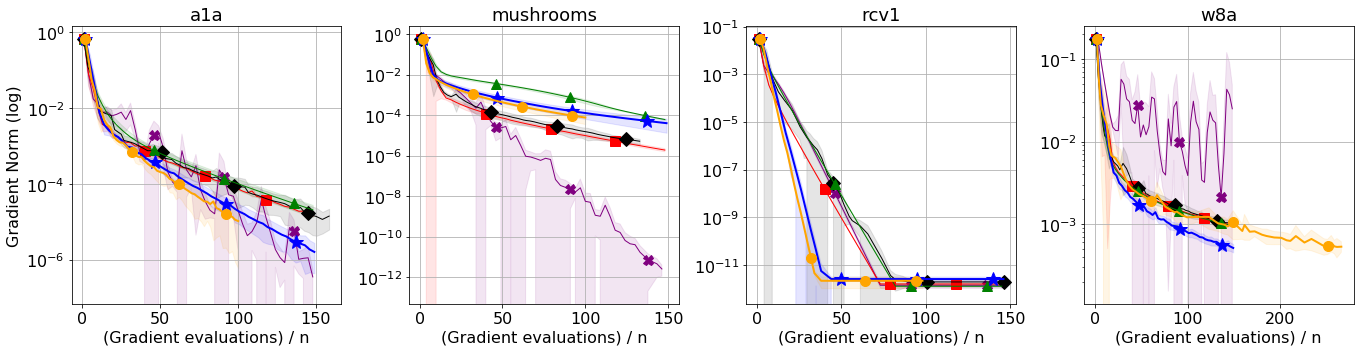

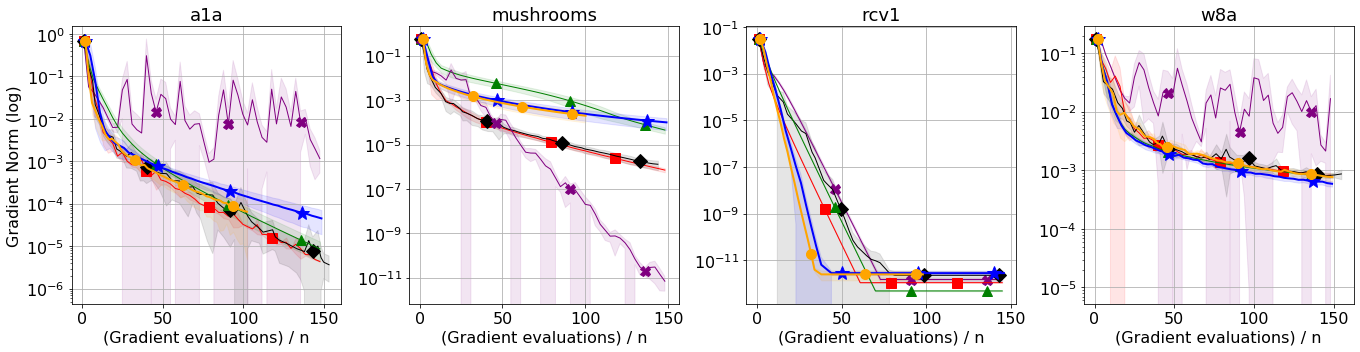

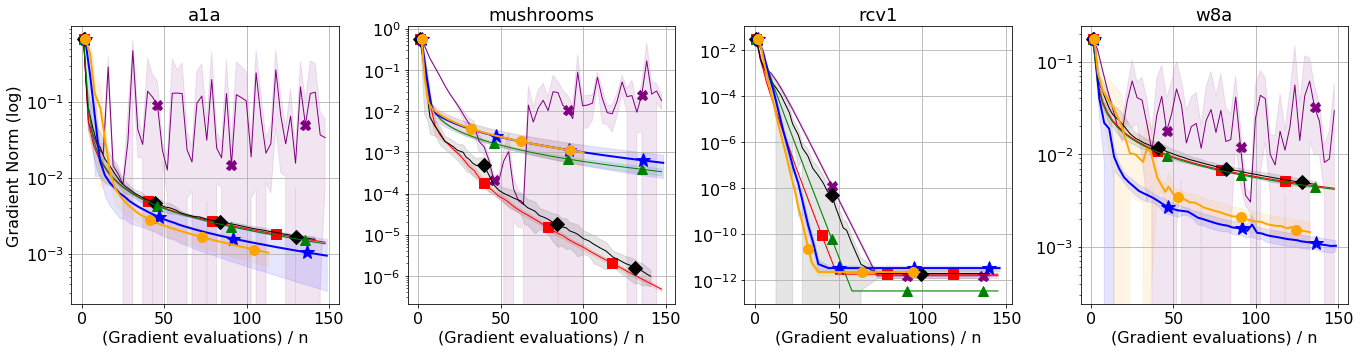

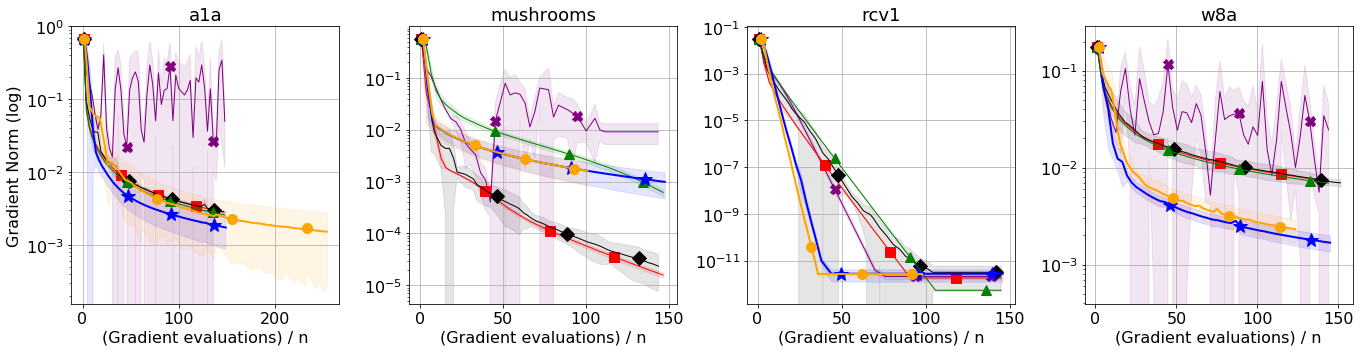

In [6]:
loss_func = "logistic_loss"
loss = "logistic"
datasets = [ "a1a", "rcv1", "mushrooms", "w8a"] #to be changed
show_legend_all=False

for bs in [1, 8, 64, 128]:
    
    best_filterby_list = []
    exp_groups = []
    
    for dataset in datasets:
    
        best_filterby_list += [

            #best sarah 

        ({'opt':{'name':'SARAH', 'init_step_size':best_step_sizes["sarah_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['sarah']}),


        # best svrg 
            
         ({'opt':{'name':'SVRG', 'init_step_size':best_step_sizes["svrg_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg']}),


        #best svrg-bb

        ({'opt':{'name':'SVRG_BB', 'init_step_size':best_step_sizes["svrg_bb_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_bb']}),



        #best svrg loopless

        ({'opt':{'name':'SVRG_Loopless', 'init_step_size':best_step_sizes["svrg_loopless_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_loopless']}),


        #svrg-ada optimizers

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':0, 'r':1/bs}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada']}),

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada_at']}),

    ]
        exp_groups.append("exp_" + dataset)

    combined_filterby_list = best_filterby_list 
    
    
    exp_list = form_exp_list(exp_groups, exp_config_fname)    


    

    combined_exp_list =  exp_list
    
    dataset_filterby_list = []
    for dataset in datasets:
        dataset_filterby_list.append({'dataset':dataset})
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                    exp_list=main_exp_list,
                    savedir_base=savedir_base, 
                    filterby_list = combined_filterby_list,
                    verbose=0,        
                     )
    rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.init_step_size'], 
                title_list = ['dataset'], 
                groupby_list = ['dataset', 'model'],
                log_metric_list = ["grad_norm"],
    #map_title_list=[
     #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
      #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
       #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
        #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],
    
                

                    # ylim_list=[
                     #                [(10**(-4), 5), (10**(-3.5), 5), (10**(-3), 5), None], 
                      #               [(0.86,0.95), (0.65,0.76), (0.65,0.76), (0.34,0.4)], 
#
 #                             ],
    
                     #  xlim_list=[
                      #     [(0,200), (5,200), (0,200), (0,200)],
                       #     [(0,200), (5,200), (0,200), (40,200)],                         
                        #         ],

                        legend_fontsize=16,
                          x_fontsize=16,
                          y_fontsize=16,
                          xtick_fontsize=16,
                          ytick_fontsize=16,
                          title_fontsize=18,
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'step_size':'Step size'},
                    {'grad_norm': 'Gradient Norm'},
                    {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'epoch':'Epoch'},
                    {'n_grad_evals_normalized': '(Gradient evaluations) / n'}],
                figsize=(19,5),
    plot_confidence=True,
    legend_kwargs={'bbox_to_anchor':[-1.50, -0.26], 'ncol':7, 'loc':'center'},
    #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
            )
    

Filtered: 12240/12240 experiments gathered...
Filtered: 12240/12240 experiments gathered...
Filtered: 12240/12240 experiments gathered...
Filtered: 12240/12240 experiments gathered...


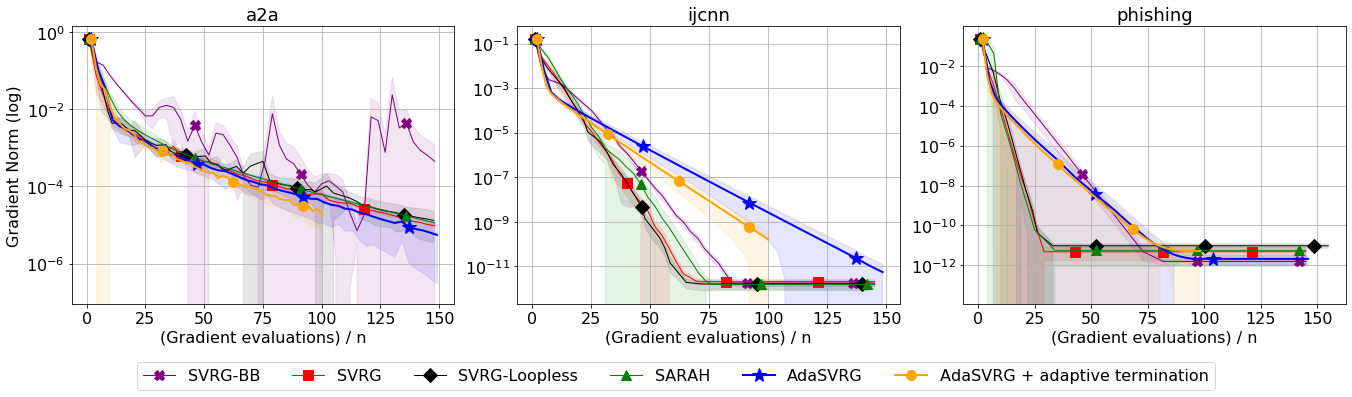

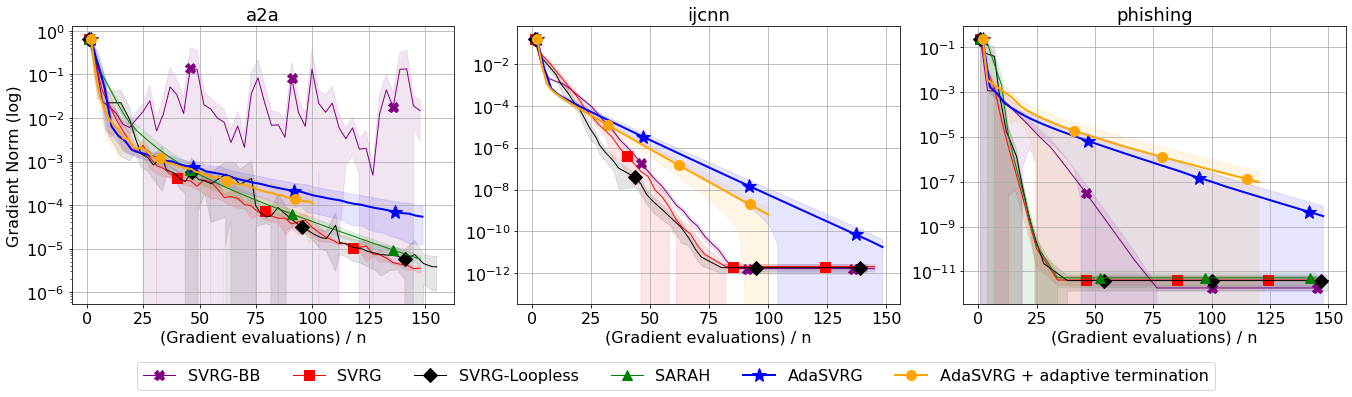

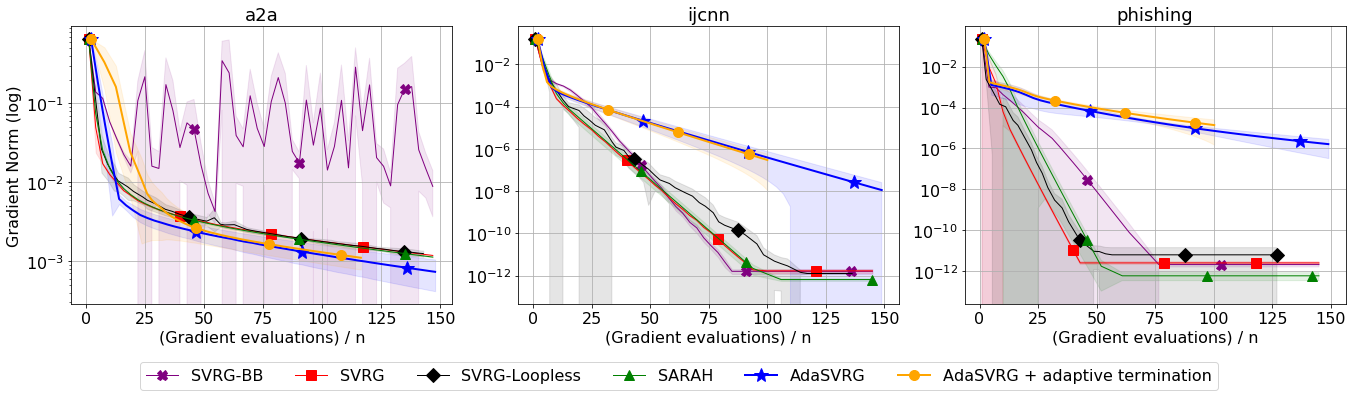

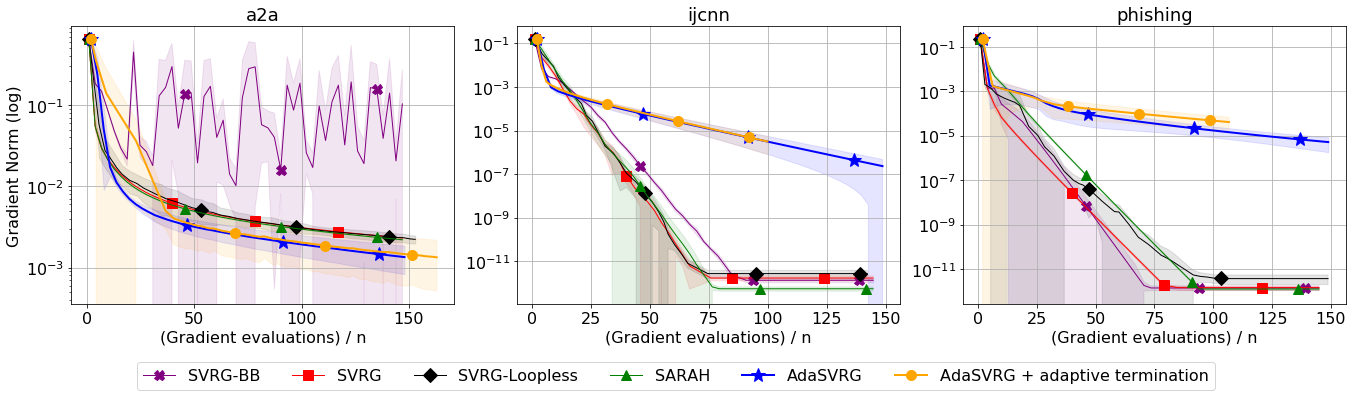

In [8]:
loss_func = "logistic_loss"
loss = "logistic"
datasets = [ "a2a", "ijcnn", "phishing"] #to be changed
show_legend_all = None

for bs in [1, 8, 64, 128]:
    
    best_filterby_list = []
    exp_groups = []
    
    for dataset in datasets:
    
        best_filterby_list += [

            #best sarah 

        ({'opt':{'name':'SARAH', 'init_step_size':best_step_sizes["sarah_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['sarah']}),


        # best svrg 
            
         ({'opt':{'name':'SVRG', 'init_step_size':best_step_sizes["svrg_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg']}),


        #best svrg-bb

        ({'opt':{'name':'SVRG_BB', 'init_step_size':best_step_sizes["svrg_bb_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_bb']}),



        #best svrg loopless

        ({'opt':{'name':'SVRG_Loopless', 'init_step_size':best_step_sizes["svrg_loopless_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_loopless']}),


        #svrg-ada optimizers

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':0, 'r':1/bs}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada']}),

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada_at']}),

    ]
        exp_groups.append("exp_" + dataset)

    combined_filterby_list = best_filterby_list 
    
    
    exp_list = form_exp_list(exp_groups, exp_config_fname)    


    

    combined_exp_list =  exp_list

    dataset_filterby_list = []
    for dataset in datasets:
        dataset_filterby_list.append({'dataset':dataset})
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                    exp_list=main_exp_list,
                    savedir_base=savedir_base, 
                    filterby_list = combined_filterby_list,
                    verbose=0,        
                     )
    rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
        show_legend_all=show_legend_all,
    legend_last_row_only=True,
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.init_step_size'], 
                title_list = ['dataset'], 
                groupby_list = ['dataset', 'model'],
                log_metric_list = ["grad_norm"],
    #map_title_list=[
     #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
      #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
       #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
        #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],
    
                

                    # ylim_list=[
                     #                [(10**(-4), 5), (10**(-3.5), 5), (10**(-3), 5), None], 
                      #               [(0.86,0.95), (0.65,0.76), (0.65,0.76), (0.34,0.4)], 
#
 #                             ],
    
                     #  xlim_list=[
                      #     [(0,200), (5,200), (0,200), (0,200)],
                       #     [(0,200), (5,200), (0,200), (40,200)],                         
                        #         ],

                        legend_fontsize=16,
                          x_fontsize=16,
                          y_fontsize=16,
                          xtick_fontsize=16,
                          ytick_fontsize=16,
                          title_fontsize=18,
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'step_size':'Step size'},
                    {'grad_norm': 'Gradient Norm'},
                    {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'epoch':'Epoch'},
                    {'n_grad_evals_normalized': '(Gradient evaluations) / n'}],
                figsize=(19,5),
    plot_confidence=True,
    legend_kwargs={'bbox_to_anchor':[-0.75, -0.26], 'ncol':7, 'loc':'center'},
    #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
            )
    

# Figures for first set of experiments on huber loss

Filtered: 16320/16320 experiments gathered...
Filtered: 16320/16320 experiments gathered...
Filtered: 16320/16320 experiments gathered...
Filtered: 16320/16320 experiments gathered...


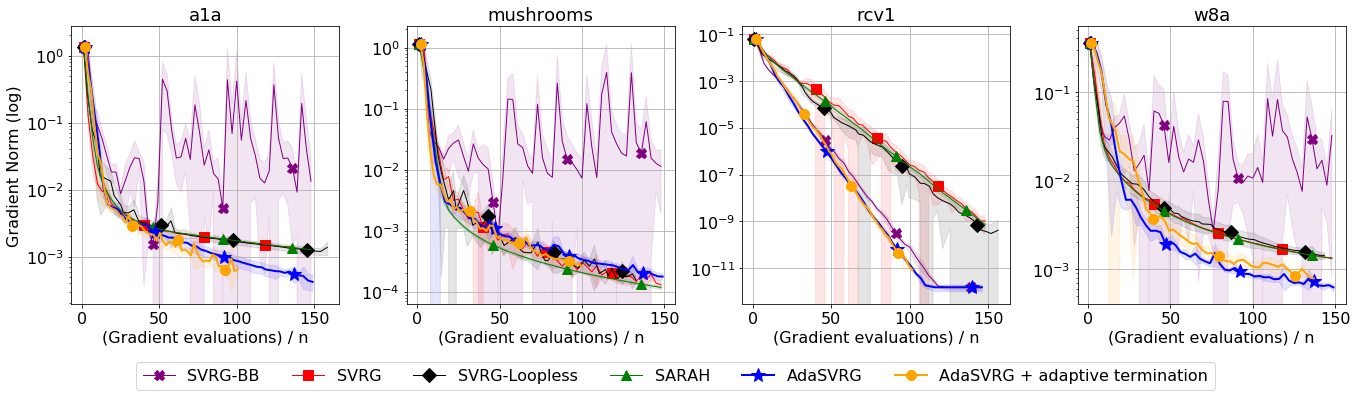

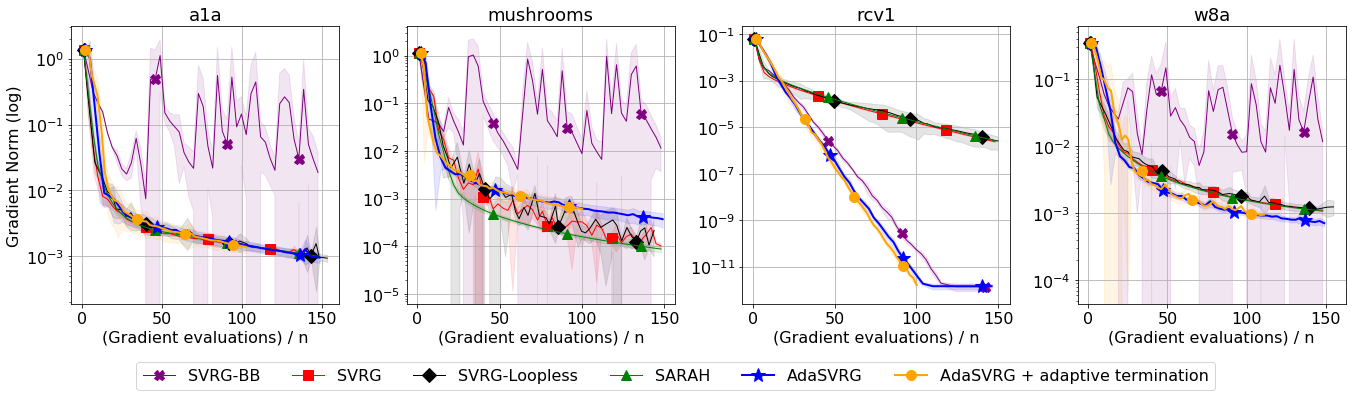

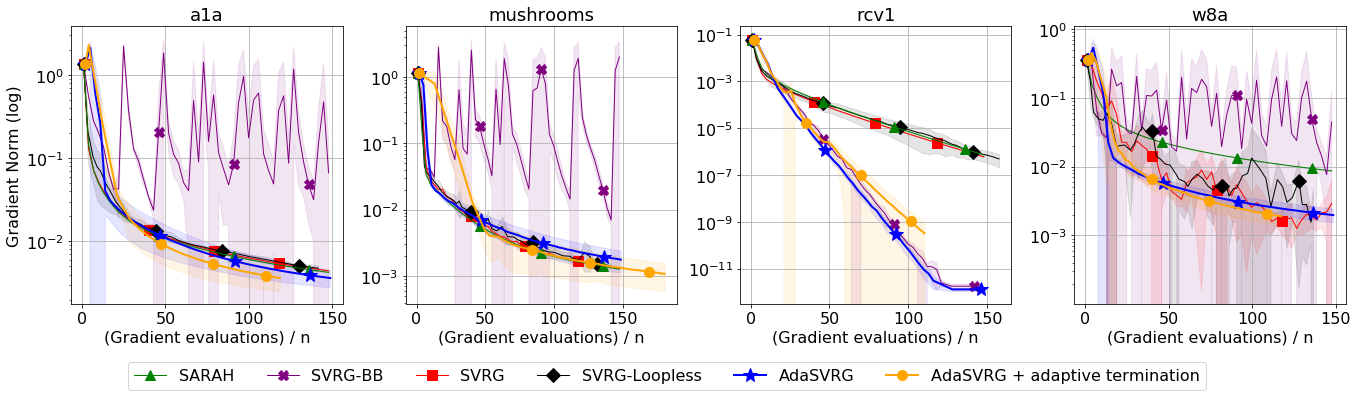

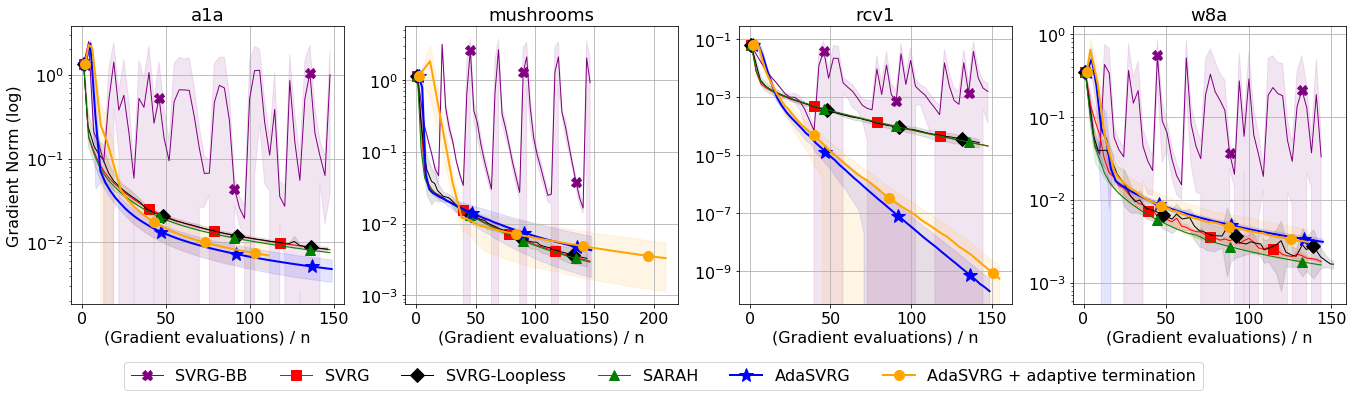

In [9]:
loss_func = "huber_loss"
loss = "huber"
datasets = ["a1a", "w8a", "rcv1", "mushrooms"] #to be changed
show_legend_all=None

for bs in [1, 8, 64, 128]:
    
    best_filterby_list = []
    exp_groups = []
    
    for dataset in datasets:
    
        best_filterby_list += [

            #best sarah 

        ({'opt':{'name':'SARAH', 'init_step_size':best_step_sizes["sarah_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['sarah']}),


        # best svrg 
            
         ({'opt':{'name':'SVRG', 'init_step_size':best_step_sizes["svrg_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg']}),


        #best svrg-bb

        ({'opt':{'name':'SVRG_BB', 'init_step_size':best_step_sizes["svrg_bb_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_bb']}),



        #best svrg loopless

        ({'opt':{'name':'SVRG_Loopless', 'init_step_size':best_step_sizes["svrg_loopless_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_loopless']}),


        #svrg-ada optimizers

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':0, 'r':1/bs}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada']}),

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada_at']}),

    ]
        exp_groups.append("exp_" + dataset)

    combined_filterby_list = best_filterby_list 
    
    
    exp_list = form_exp_list(exp_groups, exp_config_fname)    


    

    combined_exp_list =  exp_list
    
    dataset_filtbery_list = []
    for dataset in datasets:
        dataset_filterby_list.append({'dataset':dataset})
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                    exp_list=main_exp_list,
                    savedir_base=savedir_base, 
                    filterby_list = combined_filterby_list,
                    verbose=0,        
                     )
    rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=False,
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.init_step_size'], 
                title_list = ['dataset'], 
                groupby_list = ['dataset', 'model'],
                log_metric_list = ["grad_norm"],
    #map_title_list=[
     #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
      #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
       #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
        #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],
    
                

                    # ylim_list=[
                     #                [(10**(-4), 5), (10**(-3.5), 5), (10**(-3), 5), None], 
                      #               [(0.86,0.95), (0.65,0.76), (0.65,0.76), (0.34,0.4)], 
#
 #                             ],
    
                     #  xlim_list=[
                      #     [(0,200), (5,200), (0,200), (0,200)],
                       #     [(0,200), (5,200), (0,200), (40,200)],                         
                        #         ],

                        legend_fontsize=16,
                          x_fontsize=16,
                          y_fontsize=16,
                          xtick_fontsize=16,
                          ytick_fontsize=16,
                          title_fontsize=18,
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'step_size':'Step size'},
                    {'grad_norm': 'Gradient Norm'},
                    {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'epoch':'Epoch'},
                    {'n_grad_evals_normalized': '(Gradient evaluations) / n'}],
                figsize=(19,5),
    plot_confidence=True,
    legend_kwargs={'bbox_to_anchor':[-1.50, -0.26], 'ncol':7, 'loc':'center'},
    #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
            )
    

Filtered: 12240/12240 experiments gathered...
Filtered: 12240/12240 experiments gathered...
Filtered: 12240/12240 experiments gathered...
Filtered: 12240/12240 experiments gathered...


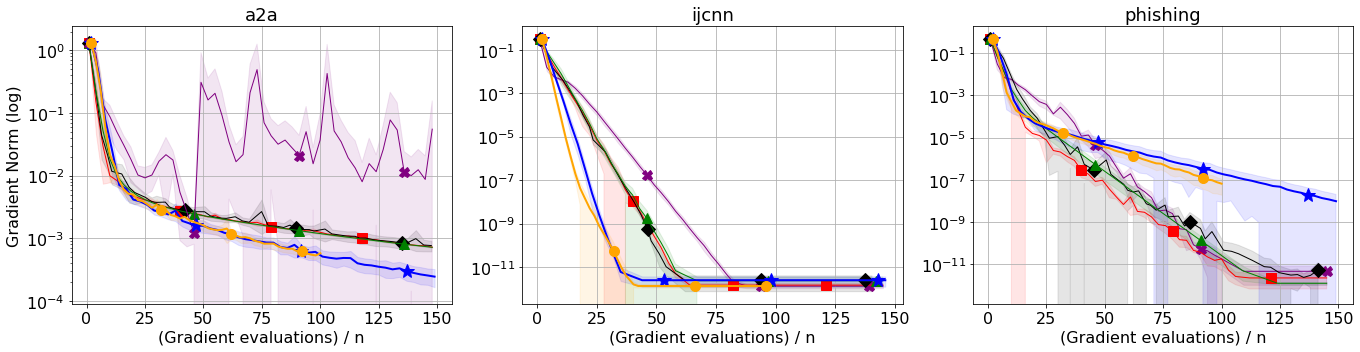

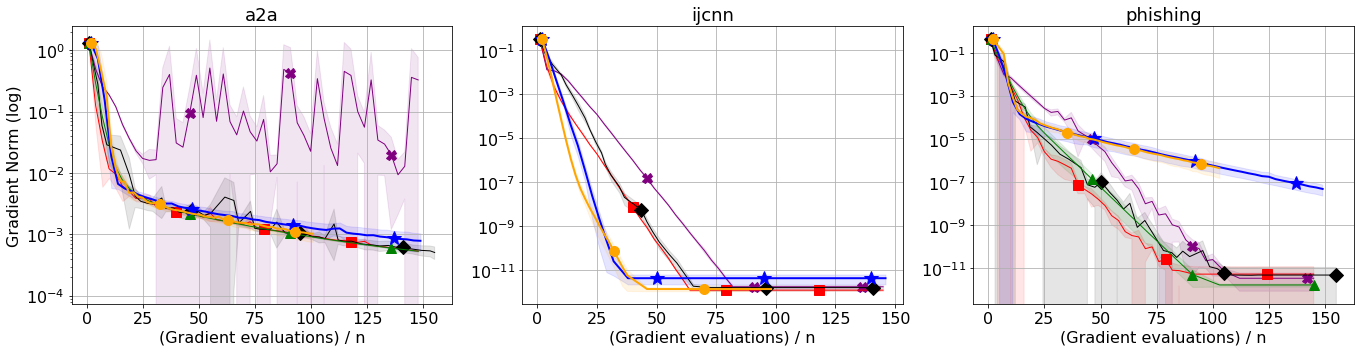

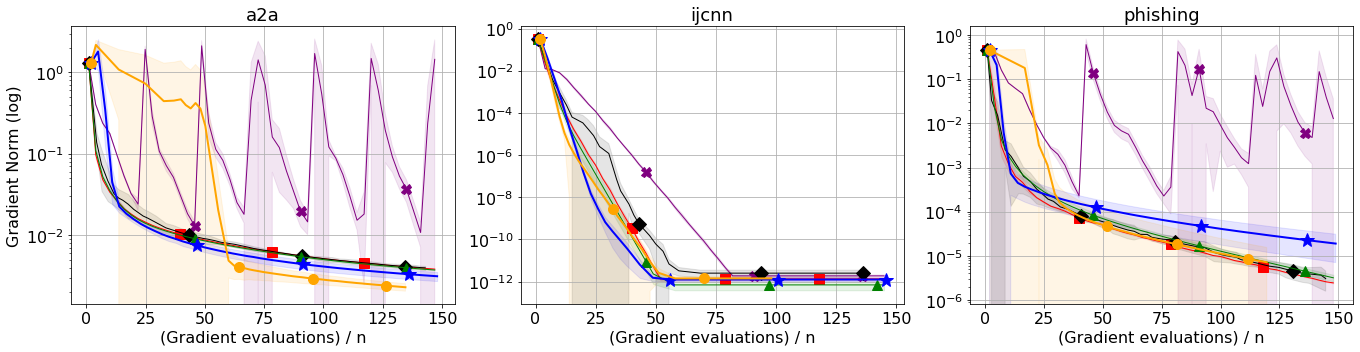

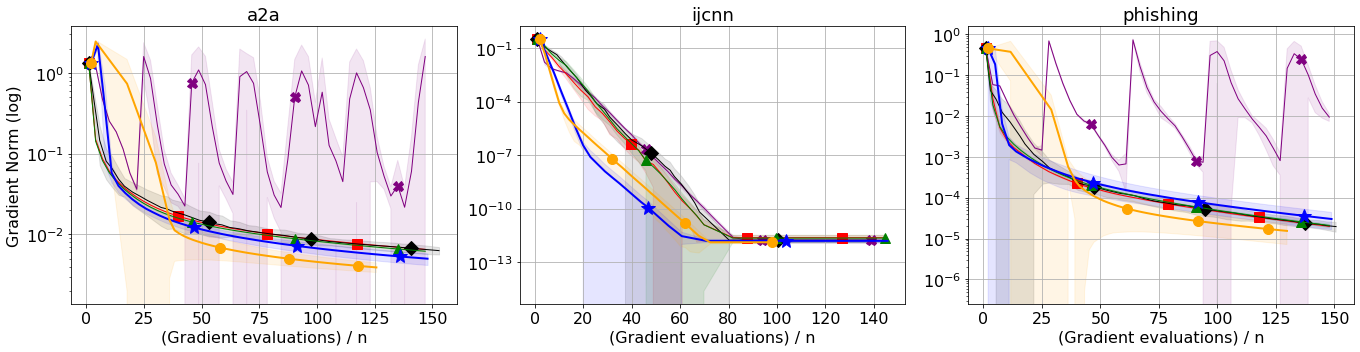

In [19]:
loss_func = "huber_loss"
loss = "huber"
datasets = [ "a2a", "ijcnn", "phishing"] #to be changed
show_legend_all=False

for bs in [1, 8, 64, 128]:
    
    best_filterby_list = []
    exp_groups = []
    
    for dataset in datasets:
    
        best_filterby_list += [

            #best sarah 

        ({'opt':{'name':'SARAH', 'init_step_size':best_step_sizes["sarah_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['sarah']}),


        # best svrg 
            
         ({'opt':{'name':'SVRG', 'init_step_size':best_step_sizes["svrg_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg']}),


        #best svrg-bb

        ({'opt':{'name':'SVRG_BB', 'init_step_size':best_step_sizes["svrg_bb_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_bb']}),



        #best svrg loopless

        ({'opt':{'name':'SVRG_Loopless', 'init_step_size':best_step_sizes["svrg_loopless_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_loopless']}),


        #svrg-ada optimizers

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':0, 'r':1/bs}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada']}),

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada_at']}),

    ]
        exp_groups.append("exp_" + dataset)

    combined_filterby_list = best_filterby_list 
    
    
    exp_list = form_exp_list(exp_groups, exp_config_fname)    


    

    combined_exp_list =  exp_list

    dataset_filtbery_list = []
    for dataset in datasets:
        dataset_filterby_list.append({'dataset':dataset})
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                    exp_list=main_exp_list,
                    savedir_base=savedir_base, 
                    filterby_list = combined_filterby_list,
                    verbose=0,        
                     )
    rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    legend_last_row_only=True,
    show_legend_all=show_legend_all,
    #show_legend_all = False,
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.init_step_size'], 
                title_list = ['dataset'], 
                groupby_list = ['dataset', 'model'],
                log_metric_list = ["grad_norm"],
    #map_title_list=[
     #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
      #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
       #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
        #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],
    
                

                    # ylim_list=[
                     #                [(10**(-4), 5), (10**(-3.5), 5), (10**(-3), 5), None], 
                      #               [(0.86,0.95), (0.65,0.76), (0.65,0.76), (0.34,0.4)], 
#
 #                             ],
    
                     #  xlim_list=[
                      #     [(0,200), (5,200), (0,200), (0,200)],
                       #     [(0,200), (5,200), (0,200), (40,200)],                         
                        #         ],

                        legend_fontsize=16,
                          x_fontsize=16,
                          y_fontsize=16,
                          xtick_fontsize=16,
                          ytick_fontsize=16,
                          title_fontsize=18,
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'step_size':'Step size'},
                    {'grad_norm': 'Gradient Norm'},
                    {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'epoch':'Epoch'},
                    {'n_grad_evals_normalized': '(Gradient evaluations) / n'}],
                figsize=(19,5),
    plot_confidence=True,
    legend_kwargs={'bbox_to_anchor':[-0.75, -0.26], 'ncol':7, 'loc':'center'},
    #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
            )
    

# Figures for first set of experiments on squared loss

Filtered: 16320/16320 experiments gathered...
Filtered: 16320/16320 experiments gathered...
Filtered: 16320/16320 experiments gathered...
Filtered: 16320/16320 experiments gathered...


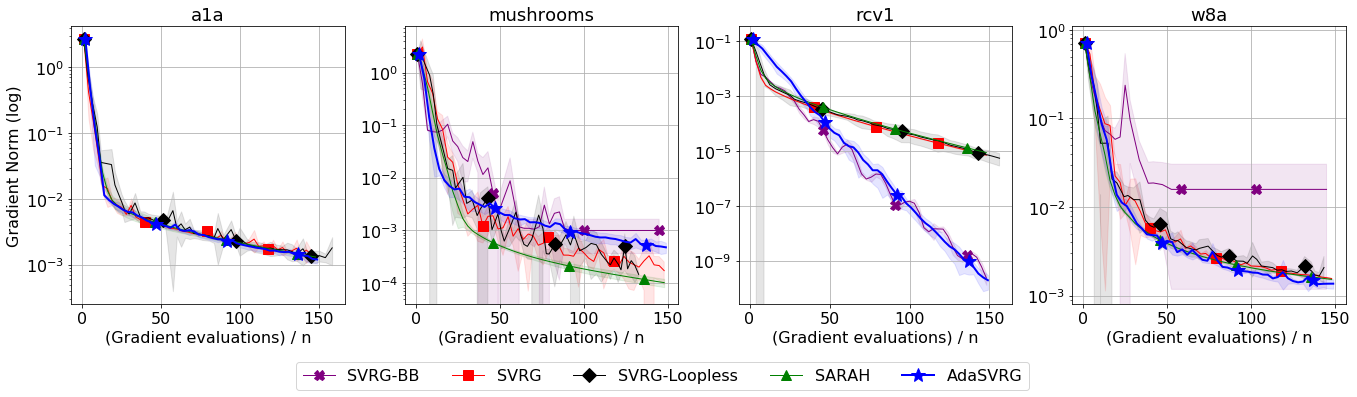

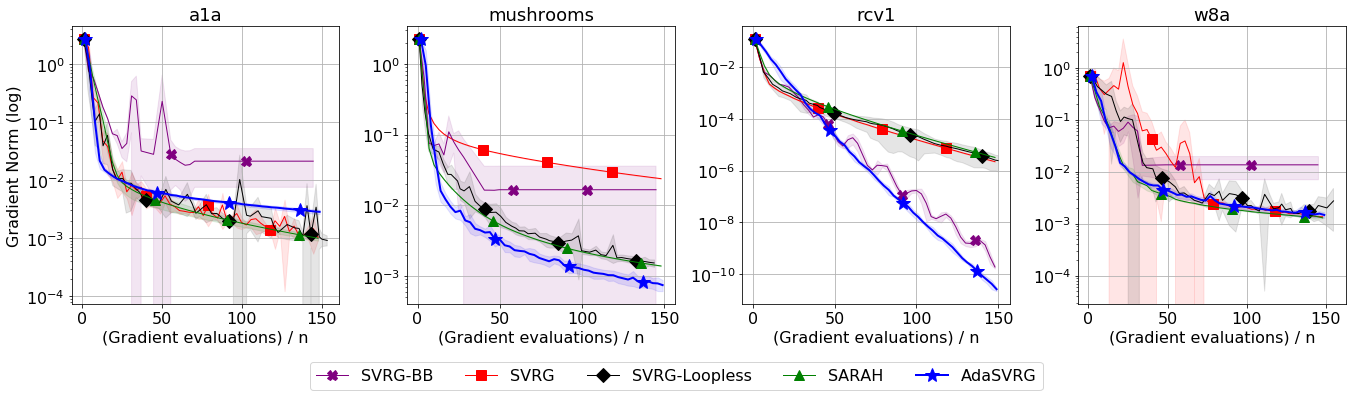

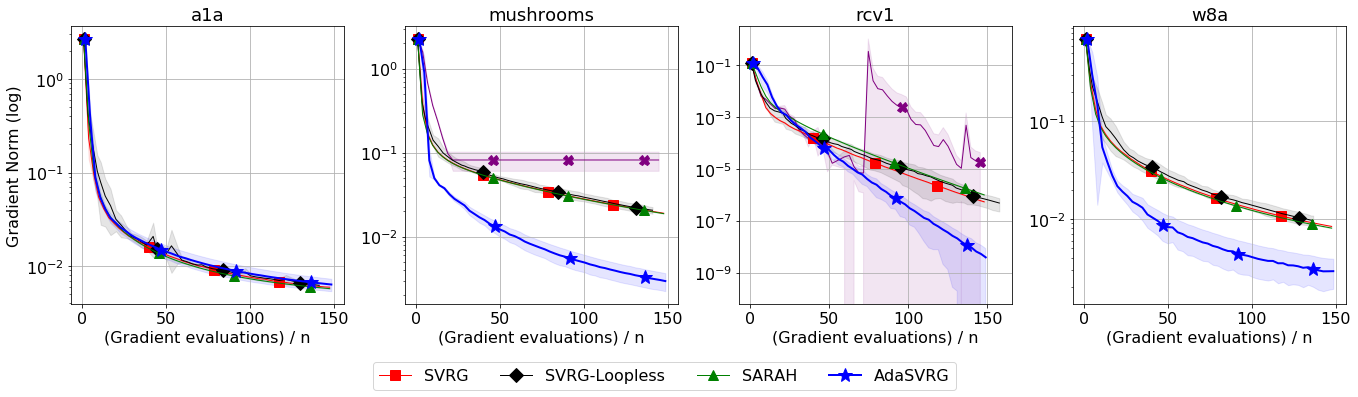

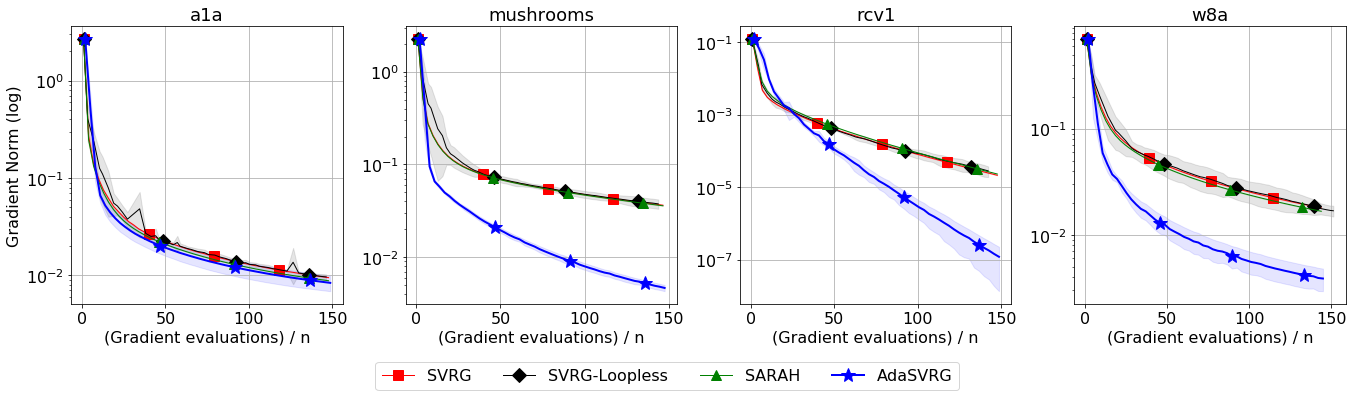

In [7]:
loss_func = "squared_loss"
loss = "squared"
datasets = ["a1a", "w8a", "rcv1", "mushrooms"] #to be changed
remove_svrg_bb = True
show_legend_all=None

for bs in [1, 8, 64, 128]:
    
    best_filterby_list = []
    exp_groups = []
    
    for dataset in datasets:
        
        
        
        best_filterby_list += [

            #best sarah 

        ({'opt':{'name':'SARAH', 'init_step_size':best_step_sizes["sarah_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['sarah']}),


        # best svrg 
            
         ({'opt':{'name':'SVRG', 'init_step_size':best_step_sizes["svrg_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg']}),]


        #best svrg-bb
        
        if remove_svrg_bb:
            if "svrg_bb_" + str(bs) + "_" + loss +  "_" + dataset not in opt_to_remove:
                best_filterby_list +=   [
        
        ({'opt':{'name':'SVRG_BB', 'init_step_size':best_step_sizes["svrg_bb_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_bb']}),]
                
        else:
            best_filterby_list +=   [
        
        ({'opt':{'name':'SVRG_BB', 'init_step_size':best_step_sizes["svrg_bb_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_bb']}),]


        #best svrg loopless

        best_filterby_list += [
        ({'opt':{'name':'SVRG_Loopless', 'init_step_size':best_step_sizes["svrg_loopless_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_loopless']}),


        #svrg-ada optimizers

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':0, 'r':1/bs}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada']}),

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada_at']}),

    ]
        exp_groups.append("exp_" + dataset)

    combined_filterby_list = best_filterby_list 
    
    
    exp_list = form_exp_list(exp_groups, exp_config_fname)    


    

    combined_exp_list =  exp_list
    
    dataset_filtbery_list = []
    for dataset in datasets:
        dataset_filterby_list.append({'dataset':dataset})
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                    exp_list=main_exp_list,
                    savedir_base=savedir_base, 
                    filterby_list = combined_filterby_list,
                    verbose=0,        
                     )
    rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    legend_last_row_only=False,
    show_legend_all=show_legend_all,
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.init_step_size'], 
                title_list = ['dataset'], 
                groupby_list = ['dataset', 'model'],
                log_metric_list = ["grad_norm"],
    #map_title_list=[
     #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
      #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
       #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
        #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],
    
                

                    # ylim_list=[
                     #                [(10**(-4), 5), (10**(-3.5), 5), (10**(-3), 5), None], 
                      #               [(0.86,0.95), (0.65,0.76), (0.65,0.76), (0.34,0.4)], 
#
 #                             ],
    
                     #  xlim_list=[
                      #     [(0,200), (5,200), (0,200), (0,200)],
                       #     [(0,200), (5,200), (0,200), (40,200)],                         
                        #         ],

                        legend_fontsize=16,
                          x_fontsize=16,
                          y_fontsize=16,
                          xtick_fontsize=16,
                          ytick_fontsize=16,
                          title_fontsize=18,
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'step_size':'Step size'},
                    {'grad_norm': 'Gradient Norm'},
                    {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'epoch':'Epoch'},
                    {'n_grad_evals_normalized': '(Gradient evaluations) / n'}],
                figsize=(19,5),
    plot_confidence=True,
    legend_kwargs={'bbox_to_anchor':[-1.50, -0.26], 'ncol':7, 'loc':'center'},
    #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
            )
    

Filtered: 12240/12240 experiments gathered...
Filtered: 12240/12240 experiments gathered...
Filtered: 12240/12240 experiments gathered...
Filtered: 12240/12240 experiments gathered...


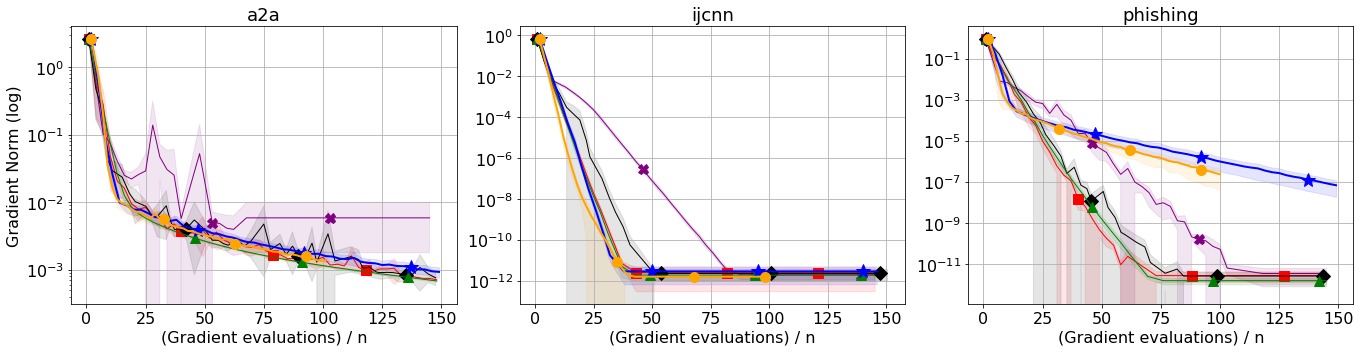

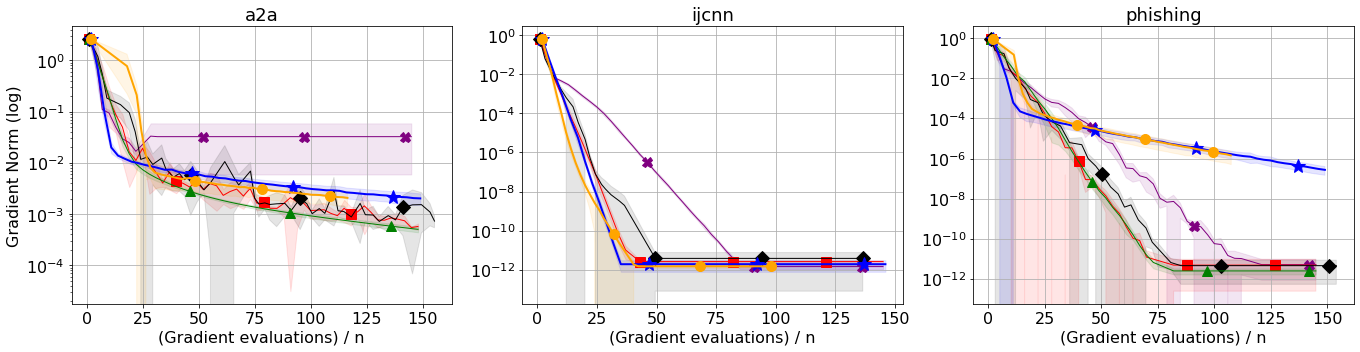

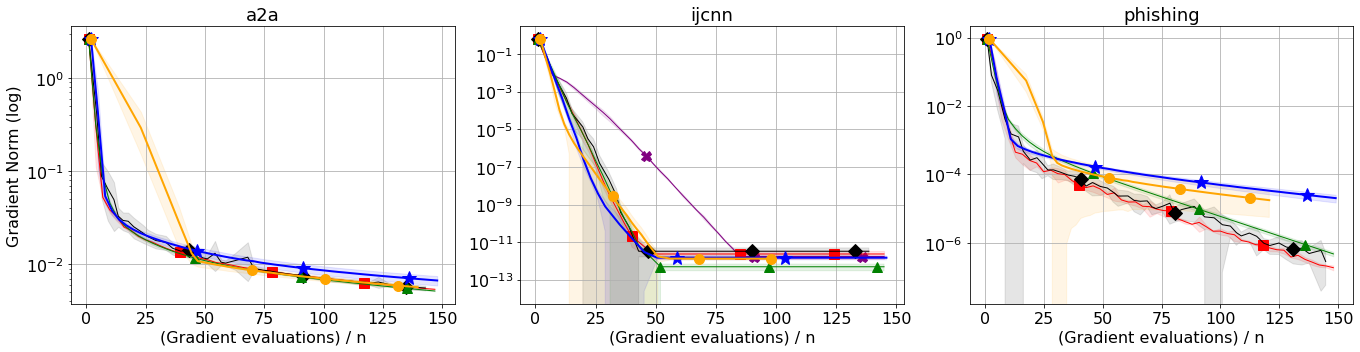

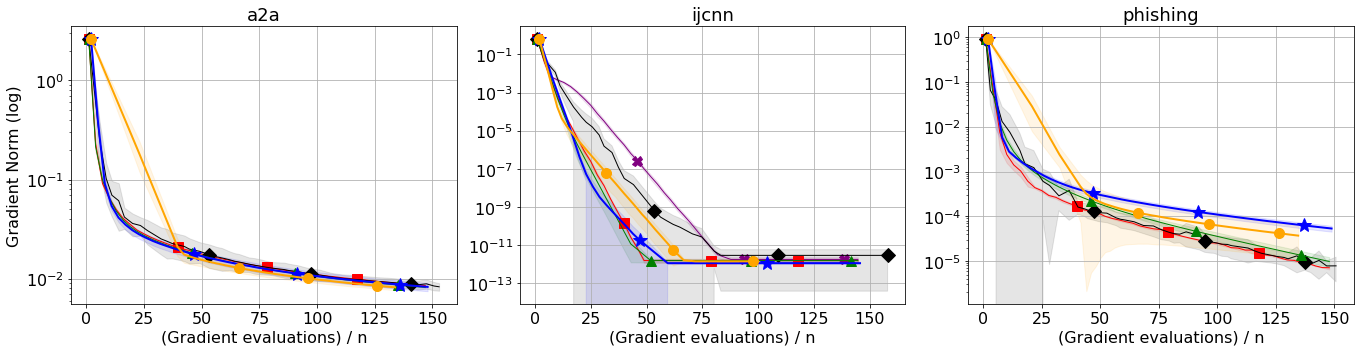

In [22]:
loss_func = "squared_loss"
loss = "squared"
datasets = ["a2a", "ijcnn", "phishing"] #to be changed
show_legend_all=False

for bs in [1, 8, 64, 128]:
    
    best_filterby_list = []
    exp_groups = []
    
    for dataset in datasets:
    
        best_filterby_list += [

            #best sarah 

        ({'opt':{'name':'SARAH', 'init_step_size':best_step_sizes["sarah_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['sarah']}),


        # best svrg 
            
         ({'opt':{'name':'SVRG', 'init_step_size':best_step_sizes["svrg_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg']}),]


        #best svrg-bb

        if "svrg_bb_" + str(bs) + "_" + loss +  "_" + dataset not in opt_to_remove:
            best_filterby_list +=   [
        
        ({'opt':{'name':'SVRG_BB', 'init_step_size':best_step_sizes["svrg_bb_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_bb']}),]



        #best svrg loopless
        best_filterby_list +=[
        ({'opt':{'name':'SVRG_Loopless', 'init_step_size':best_step_sizes["svrg_loopless_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg_loopless']}),


        #svrg-ada optimizers

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':0, 'r':1/bs}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada']}),

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada_at']}),

    ]
        exp_groups.append("exp_" + dataset)

    combined_filterby_list = best_filterby_list 
    
    
    exp_list = form_exp_list(exp_groups, exp_config_fname)    


    

    combined_exp_list =  exp_list

    dataset_filtbery_list = []
    for dataset in datasets:
        dataset_filterby_list.append({'dataset':dataset})
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                    exp_list=main_exp_list,
                    savedir_base=savedir_base, 
                    filterby_list = combined_filterby_list,
                    verbose=0,        
                     )
    rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.init_step_size'], 
                title_list = ['dataset'], 
                groupby_list = ['dataset', 'model'],
                log_metric_list = ["grad_norm"],
    #map_title_list=[
     #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
      #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
       #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
        #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],
    
                

                    # ylim_list=[
                     #                [(10**(-4), 5), (10**(-3.5), 5), (10**(-3), 5), None], 
                      #               [(0.86,0.95), (0.65,0.76), (0.65,0.76), (0.34,0.4)], 
#
 #                             ],
    
                     #  xlim_list=[
                      #     [(0,200), (5,200), (0,200), (0,200)],
                       #     [(0,200), (5,200), (0,200), (40,200)],                         
                        #         ],

                        legend_fontsize=16,
                          x_fontsize=16,
                          y_fontsize=16,
                          xtick_fontsize=16,
                          ytick_fontsize=16,
                          title_fontsize=18,
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'step_size':'Step size'},
                    {'grad_norm': 'Gradient Norm'},
                    {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'epoch':'Epoch'},
                    {'n_grad_evals_normalized': '(Gradient evaluations) / n'}],
                figsize=(19,5),
    plot_confidence=True,
    legend_kwargs={'bbox_to_anchor':[-0.75, -0.26], 'ncol':7, 'loc':'center'},
    #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
            )
    

# Gradient Norm vs Stepsize for batch size 64

In [7]:
#Define styles again because we want markevery = 1
markersize = 8
markevery = 1
linewidth = 1
marker = '*'
styles = {}

linestyle = 'solid'

styles['svrg_ada'] = {'label':'AdaSVRG',  'color':'blue','marker':marker ,
                         'markersize':15, 'marker':marker,
                           'linewidth': linewidth, 'linestyle': linestyle,
                     'markevery':markevery}

styles['svrg_ada_at'] = {'label':'AdaSVRG + adaptive termination',  'color':'orange','marker':marker ,
                         'markersize':10, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery, 'linestyle':linestyle }

styles['svrg'] = {'label':'SVRG',  'color':'red','marker':markersize ,
                         'markersize':10, 'marker':'s',
                           'linewidth': linewidth,
                     'markevery':markevery,'linestyle':linestyle }

styles['svrg_bb'] = {'label':'SVRG-BB',  'color':'purple','marker':markersize ,
                         'markersize':10, 'marker':'X',
                           'linewidth': linewidth,
                     'markevery':markevery ,'linestyle':linestyle}

styles['sarah'] = {'label':'SARAH',  'color':'green','marker':markersize ,
                         'markersize':10, 'marker':'^',
                           'linewidth': linewidth,
                     'markevery':markevery,'linestyle':linestyle }

styles['svrg_loopless'] = {'label':'SVRG-Loopless',  'color':'black','marker':markersize ,
                         'markersize':10, 'marker':'D',
                           'linewidth': linewidth,
                     'markevery':markevery, 'linestyle':linestyle }

logistic_loss
Filtered: 8160/8160 experiments gathered...
huber_loss
Filtered: 8160/8160 experiments gathered...
squared_loss
Filtered: 8160/8160 experiments gathered...


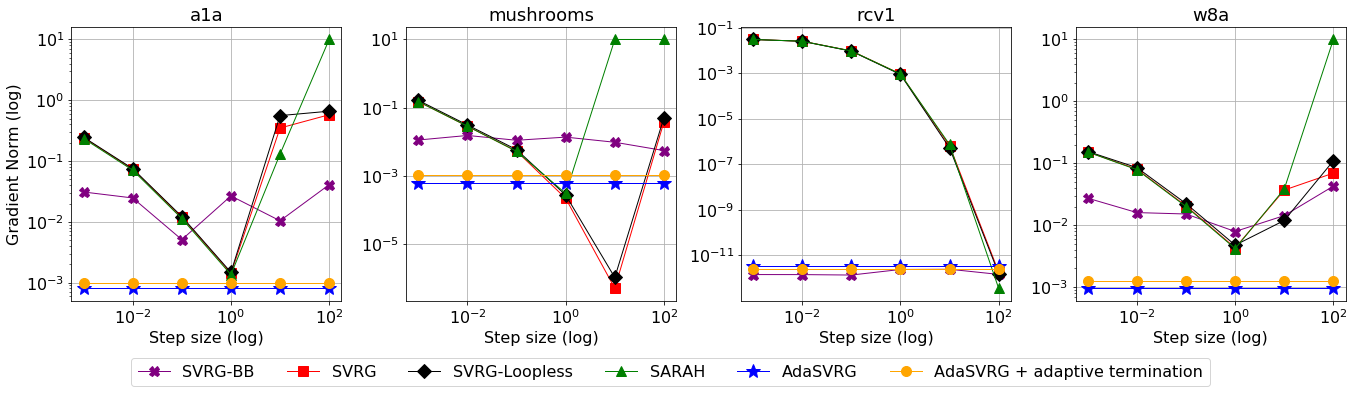

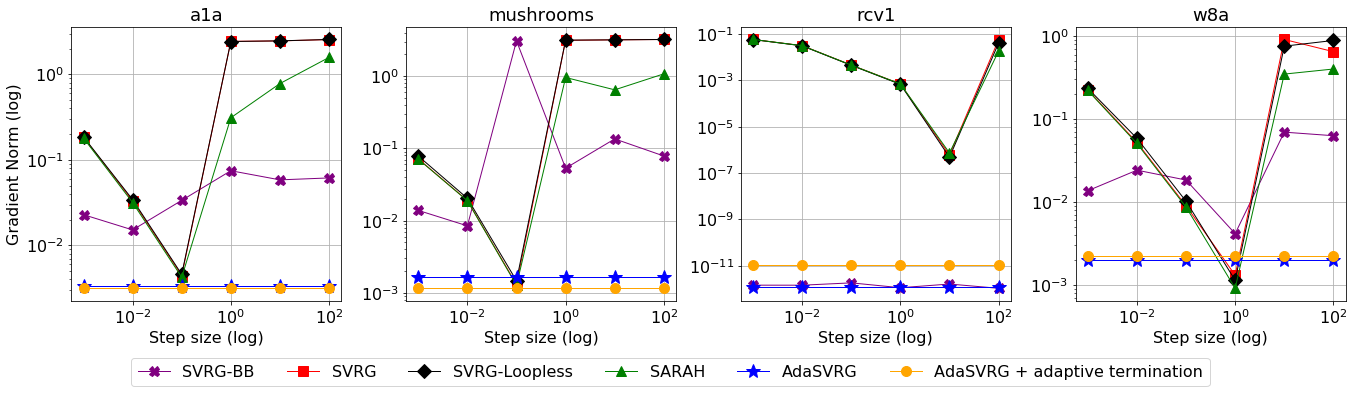

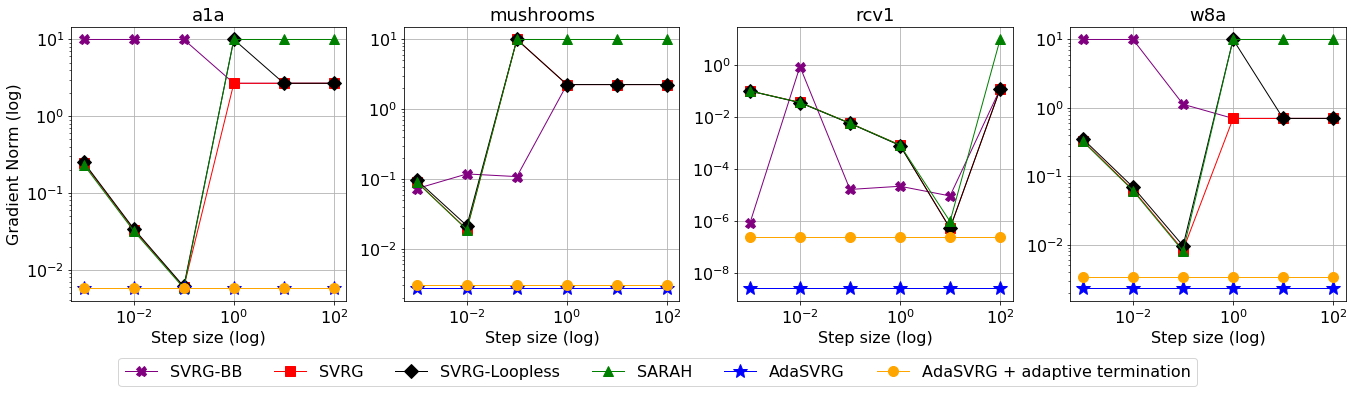

In [11]:
batch_size = 64
loss_func = "logistic_loss"

for loss_func in ["logistic_loss", "huber_loss", "squared_loss"]:
    print(loss_func)
    best_filterby_list = [

            #best sarah for the 3 datasets

        ({'opt':{'name':'SARAH','r':1/batch_size}, 
           'batch_size':batch_size, "loss_func":loss_func},     
           {'style':styles['sarah']}),


        # best svrg for the 3 datasets
         ({'opt':{'name':'SVRG', 'r':1/batch_size}, 
           'batch_size':batch_size, "loss_func":loss_func},     
           {'style':styles['svrg']}), 


        #best svrg-bb for the 3 datasets

        ({'opt':{'name':'SVRG_BB', 'r':1/batch_size}, 
           'batch_size':batch_size, "loss_func":loss_func},    
           {'style':styles['svrg_bb']}),


        #best svrg loopless for the 3 datasets

        ({'opt':{'name':'SVRG_Loopless', 'r':1/batch_size}, 
           'batch_size':batch_size, "loss_func":loss_func},      
           {'style':styles['svrg_loopless']}),

        #svrg-ada optimizers

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':0}, 'batch_size':batch_size, "loss_func":loss_func}

          , {'style':styles['svrg_ada']}),

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5}, 'batch_size':batch_size, "loss_func":loss_func}

          , {'style':styles['svrg_ada_at']}),

    ]

    combined_filterby_list = best_filterby_list 


    exp_groups = [
              "exp_a1a",
              "exp_rcv1",
                "exp_mushrooms",
                "exp_w8a"
                 ]
    exp_list = form_exp_list(exp_groups, exp_config_fname)    




    combined_exp_list =  exp_list

    dataset_filterby_list = [
                            {'dataset':'a1a'},
                            {'dataset': 'rcv1'},
                            {'dataset': 'mushrooms'},
                            {'dataset': 'w8a'}
                            ]
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                        exp_list=main_exp_list,
                        savedir_base=savedir_base, 
                        filterby_list = combined_filterby_list,
                        verbose=0,        
                         )
    rm.get_plot_all(
        avg_across='runs',
        plot_vs_stepsize=True,
        plot_median=True,
        order='metrics_by_groups',
        legend_last_row_only=True,
                    y_metric_list =  ['grad_norm'], 
                    x_metric='epoch',
                    legend_list=['opt.name', 'opt.init_step_size'], 
                    title_list = ['dataset'], 
                    groupby_list = ['dataset', 'model'],
                    log_metric_list = ["grad_norm", "epoch"],
        #map_title_list=[
         #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
          #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
           #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
            #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],



                        # ylim_list=[
                         #                [(10**(-4), 5), (10**(-3.5), 5), (10**(-3), 5), None], 
                          #               [(0.86,0.95), (0.65,0.76), (0.65,0.76), (0.34,0.4)], 
    #
     #                             ],

                         #  xlim_list=[
                          #     [(0,200), (5,200), (0,200), (0,200)],
                           #     [(0,200), (5,200), (0,200), (40,200)],                         
                            #         ],

                            legend_fontsize=16,
                              x_fontsize=16,
                              y_fontsize=16,
                              xtick_fontsize=16,
                              ytick_fontsize=16,
                              title_fontsize=18,

        map_ylabel_list=[{'train_loss':'Train loss'}, 
                         {'val_acc':'Validation accuracy'},
                         {'step_size':'Step size'},
                        {'grad_norm': 'Gradient Norm'},
                        {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
        map_xlabel_list=[{'epoch':'Step size'},
                        {'n_grad_evals_normalized': 'Stochastic gradient evaluations (normalized)'}],
                    figsize=(19,5),
        plot_confidence=False,
        legend_kwargs={'bbox_to_anchor':[-1.50, -0.26], 'ncol':7, 'loc':'center'},
        #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
                )

logistic_loss
Filtered: 6120/6120 experiments gathered...
huber_loss
Filtered: 6120/6120 experiments gathered...
squared_loss
Filtered: 6120/6120 experiments gathered...


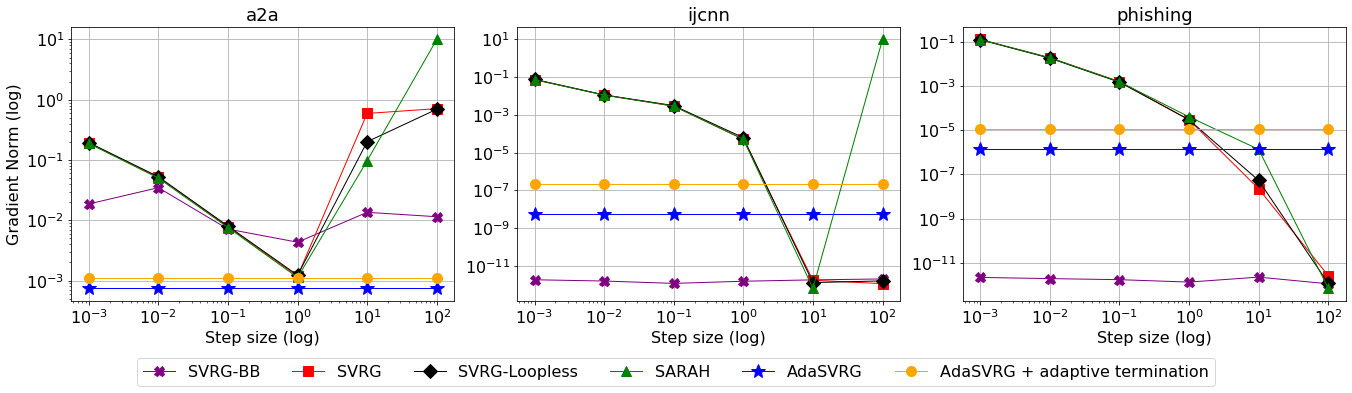

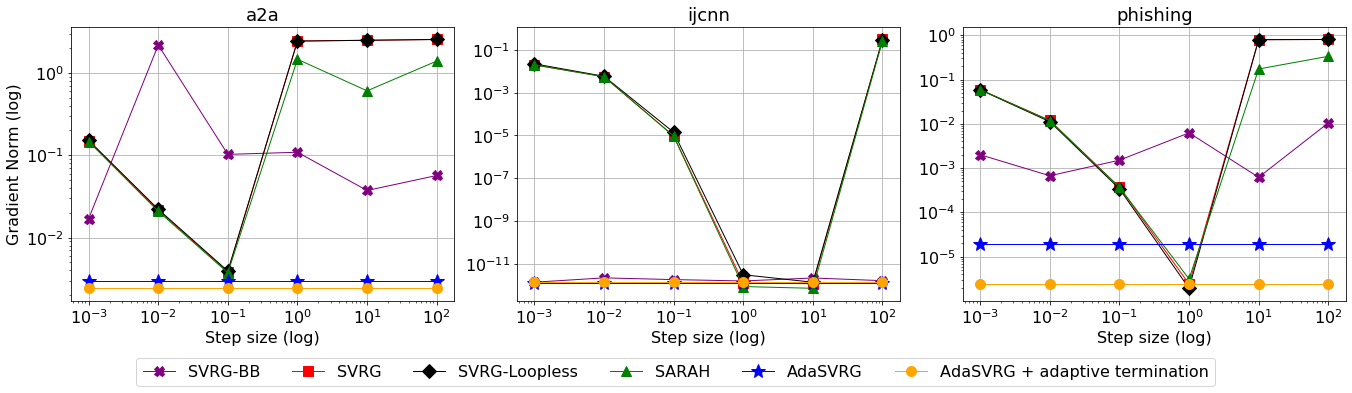

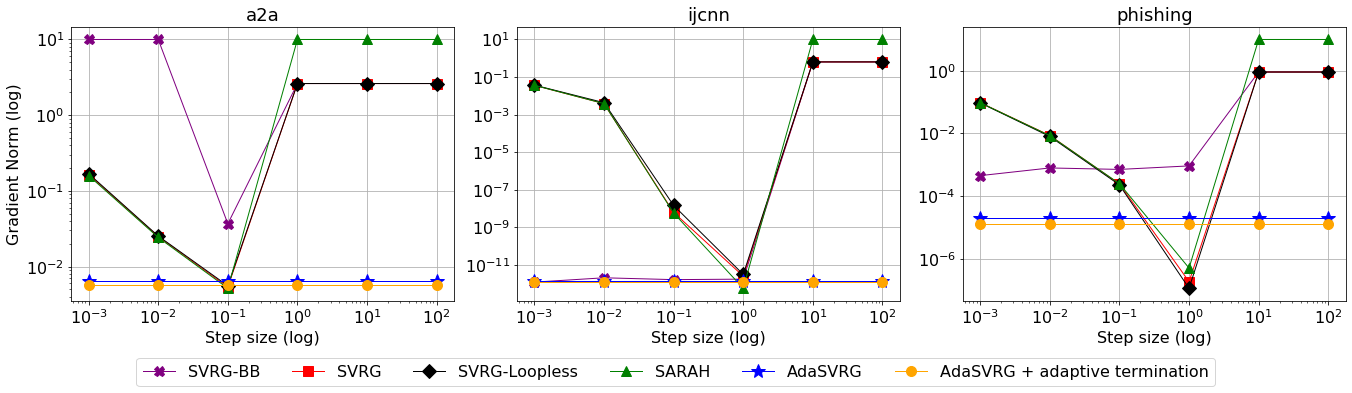

In [9]:
batch_size = 64

for loss_func in ["logistic_loss", "huber_loss", "squared_loss"]:
    print(loss_func)
    best_filterby_list = [

            #best sarah for the 3 datasets

        ({'opt':{'name':'SARAH','r':1/batch_size}, 
           'batch_size':batch_size, "loss_func":loss_func},     
           {'style':styles['sarah']}),


        # best svrg for the 3 datasets
         ({'opt':{'name':'SVRG', 'r':1/batch_size}, 
           'batch_size':batch_size, "loss_func":loss_func},     
           {'style':styles['svrg']}), 


        #best svrg-bb for the 3 datasets

        ({'opt':{'name':'SVRG_BB', 'r':1/batch_size}, 
           'batch_size':batch_size, "loss_func":loss_func},    
           {'style':styles['svrg_bb']}),


        #best svrg loopless for the 3 datasets

        ({'opt':{'name':'SVRG_Loopless', 'r':1/batch_size}, 
           'batch_size':batch_size, "loss_func":loss_func},      
           {'style':styles['svrg_loopless']}),

        #svrg-ada optimizers

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':0}, 'batch_size':batch_size, "loss_func":loss_func}

          , {'style':styles['svrg_ada']}),

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5}, 'batch_size':batch_size, "loss_func":loss_func}

          , {'style':styles['svrg_ada_at']}),

    ]

    combined_filterby_list = best_filterby_list 


    exp_groups = [
                "exp_a2a",
                "exp_ijcnn",
                "exp_phishing"
                 ]
    exp_list = form_exp_list(exp_groups, exp_config_fname)    




    combined_exp_list =  exp_list

    dataset_filterby_list = [
                            {'dataset': 'a2a'},
                            {'dataset': 'ijcnn'},
        {'dataset': 'phishing'}
                            ]
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                        exp_list=main_exp_list,
                        savedir_base=savedir_base, 
                        filterby_list = combined_filterby_list,
                        verbose=0,        
                         )
    rm.get_plot_all(
        avg_across='runs',
        plot_vs_stepsize=True,
        plot_median=True,
        order='metrics_by_groups',
        legend_last_row_only=True,
                    y_metric_list =  ['grad_norm'], 
                    x_metric='epoch',
                    legend_list=['opt.name', 'opt.init_step_size'], 
                    title_list = ['dataset'], 
                    groupby_list = ['dataset', 'model'],
                    log_metric_list = ["grad_norm", "epoch"],
        #map_title_list=[
         #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
          #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
           #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
            #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],



                        # ylim_list=[
                         #                [(10**(-4), 5), (10**(-3.5), 5), (10**(-3), 5), None], 
                          #               [(0.86,0.95), (0.65,0.76), (0.65,0.76), (0.34,0.4)], 
    #
     #                             ],

                         #  xlim_list=[
                          #     [(0,200), (5,200), (0,200), (0,200)],
                           #     [(0,200), (5,200), (0,200), (40,200)],                         
                            #         ],

                            legend_fontsize=16,
                              x_fontsize=16,
                              y_fontsize=16,
                              xtick_fontsize=16,
                              ytick_fontsize=16,
                              title_fontsize=18,

        map_ylabel_list=[{'train_loss':'Train loss'}, 
                         {'val_acc':'Validation accuracy'},
                         {'step_size':'Step size'},
                        {'grad_norm': 'Gradient Norm'},
                        {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
        map_xlabel_list=[{'epoch':'Step size'},
                        {'n_grad_evals_normalized': 'Stochastic gradient evaluations (normalized)'}],
                    figsize=(19,5),
        plot_confidence=False,
        legend_kwargs={'bbox_to_anchor':[-0.75, -0.26], 'ncol':7, 'loc':'center'},
        #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
                )

# Interpolation Experiments Synthetic data

In [12]:
styles = {}
styles['svrg_ada'] = {'label':'AdaSVRG',  'color':'blue','marker':marker ,
                         'markersize':15, 'marker':'*',
                           'linewidth': 2,
                     'markevery':7 }

styles['sgd_ada'] = {'label':'AdaGrad',  'color':'red','marker':marker ,
                         'markersize':10, 'marker':'o',
                           'linewidth': 2,
                     'markevery':8 }

styles['sgd_ada_svrg_ada'] = {'label':'Hybrid',  'color':'lime','marker':markersize ,
                         'markersize':10, 'marker':'^',
                           'linewidth': linewidth,
                     'markevery':9 }

styles['sgd_ada_svrg_ada_manual'] = {'label':'Optimal Manual Switching',  'color':'orange','marker':markersize ,
                         'markersize':10, 'marker':'D',
                           'linewidth': linewidth,
                     'markevery':10 }

styles['sls'] = {'label':'SGD',  'color':'purple','marker':markersize ,
                         'markersize':10, 'marker':'X',
                           'linewidth': linewidth,
                     'markevery':10 }

styles['svrg'] = {'label':'SVRG',  'color':'black','marker':markersize ,
                         'markersize':10, 'marker':'s',
                           'linewidth': linewidth,
                     'markevery':10 }

best_breakpoint = {
    #format : loss_batch-size_false-ratio
    
    "logistic_1_0":15,
    "logistic_1_0.1":2,
    "logistic_1_0.2":2,
    
    "hinge_1_0":3, 
    "hinge_1_0.1":2,
    "hinge_1_0.2":1,
    
    
    
    "logistic_8_0":-1,
    "logistic_8_0.1":1,
    "logistic_8_0.2":1,
    
    "hinge_8_0":2, 
    "hinge_8_0.1":2,
    "hinge_8_0.2":5,
    
    
    
    "logistic_64_0":-1, #should not break out
    "logistic_64_0.1":1,
    "logistic_64_0.2":3,
    
    "hinge_64_0":40, #might need to run more
    "hinge_64_0.1":2,
    "hinge_64_0.2":5,
    
    
    "logistic_128_0":-1,
    "logistic_128_0.1":1,
    "logistic_128_0.2":5,
    
    "hinge_128_0":20, 
    "hinge_128_0.1":2,
    "hinge_128_0.2":1,
    
    
    

    
}

## Logistic loss

Filtered: 7920/7920 experiments gathered...
Filtered: 7920/7920 experiments gathered...
Filtered: 7920/7920 experiments gathered...
Filtered: 7920/7920 experiments gathered...


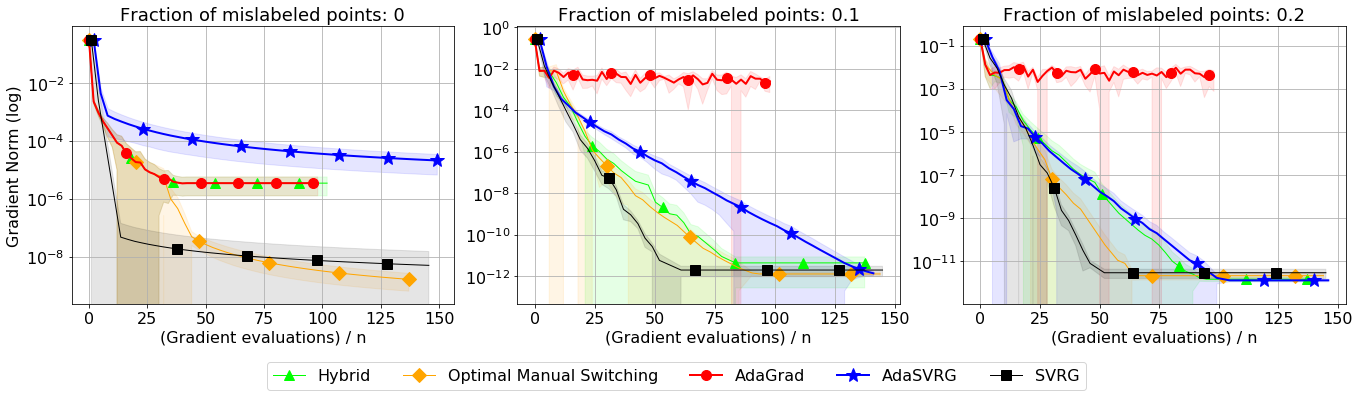

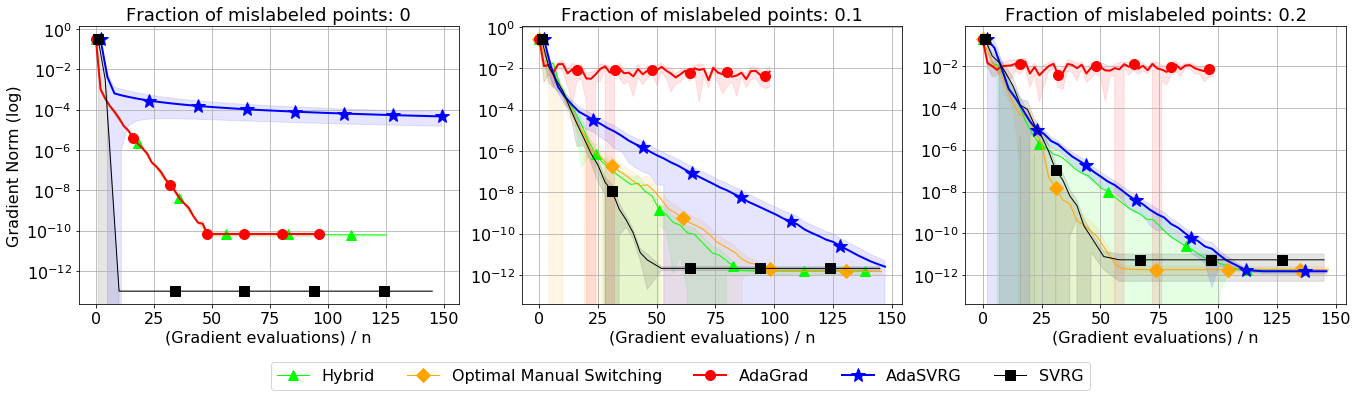

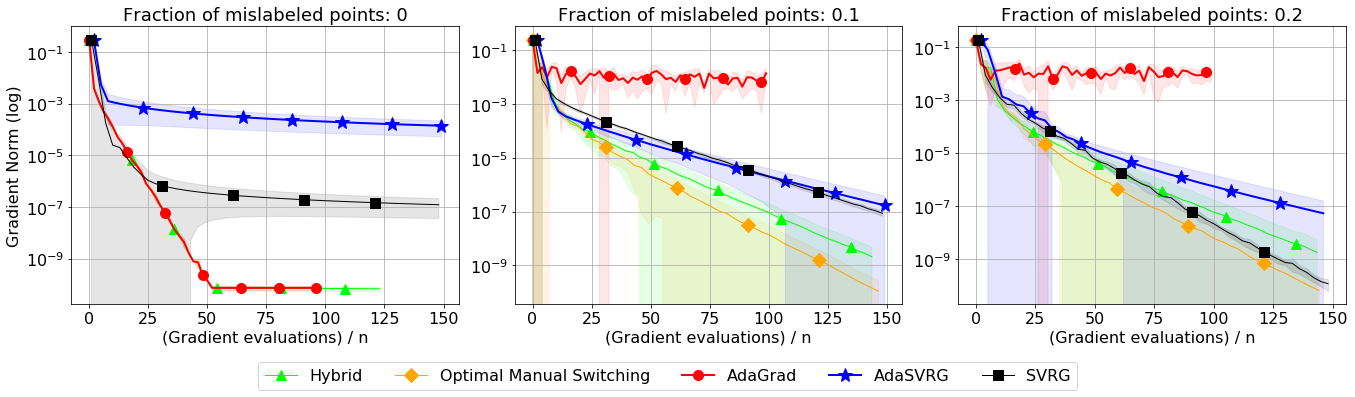

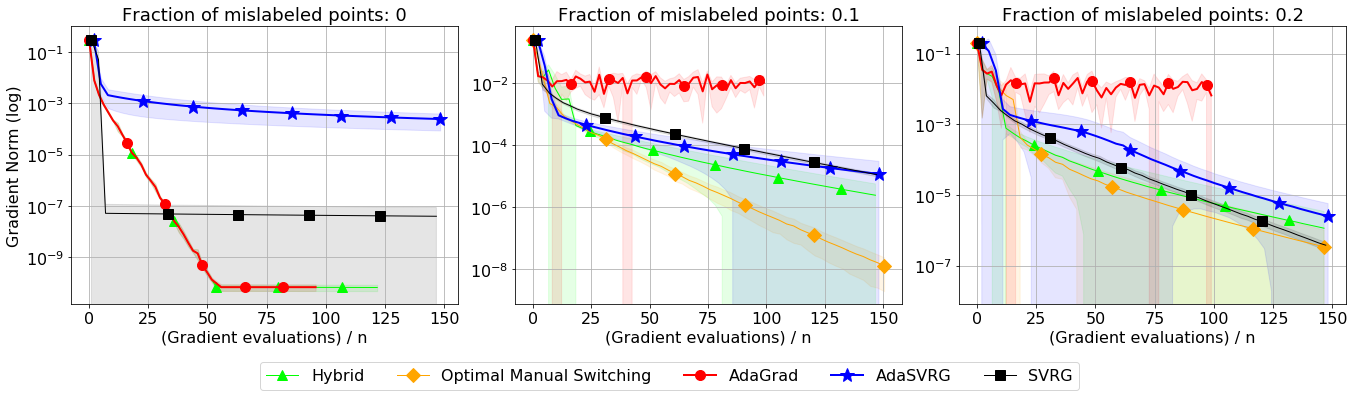

In [13]:
loss_func = "logistic_loss"
loss = "logistic"
show_legend_all=None

for bs in [1, 8, 64, 128]:
    best_filterby_list = []
    best_filterby_list += [
    
     ({'opt':{'name':'AdaGrad', 'r':1/bs}, 
       'batch_size':bs, "loss_func":loss_func},      {'style':styles['sgd_ada']}), 
        
    
    ({'opt':{'name':'AdaSVRG', 'r':1/bs}, 
       'batch_size':bs, "loss_func":loss_func},     
       {'style':styles['svrg_ada']}),
    
    ({'opt':{'name':'AdaGrad_AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5, 'r':1/bs}, 
       'batch_size':bs, "loss_func":loss_func},
      
       {'style':styles['sgd_ada_svrg_ada']}),
        
        
    
        
    ]
    
    for false_ratio in [0, 0.1, 0.2]:
        best_filterby_list += [
            
            ({'opt':{'name':'AdaGrad_AdaSVRG', 'adaptive_termination':0, 'r':1/bs, 
                     'max_epoch_sgd':best_breakpoint[loss + "_"+ str(bs) + "_" + str(false_ratio)]}, 
       'batch_size':bs, "loss_func":loss_func, 'false_ratio':false_ratio},
      
       {'style':styles['sgd_ada_svrg_ada_manual']}),
            
           # ({'opt':{'name':'sls',
            #         'init_step_size': best_step_sizes["sls_" + str(bs) + "_" + loss + "_syn_interpolation_" + str(false_ratio)]},
             #'batch_size':bs, "loss_func":loss_func, 'false_ratio':false_ratio, 'max_epoch':100},
            
            #{'style':styles['sls']}),
            
            ({'opt':{'name':'SVRG',
                     'init_step_size': best_step_sizes["svrg_" + str(bs) + "_" + loss + "_syn_interpolation_" + str(false_ratio)]},
             'batch_size':bs, "loss_func":loss_func, 'false_ratio':false_ratio},
            
            {'style':styles['svrg']}),
            
        ]

    combined_filterby_list = best_filterby_list 
    exp_groups = [
          "exp_syn_interpolation6"
             ]
    exp_list = form_exp_list(exp_groups, exp_config_fname)    


    

    combined_exp_list =  exp_list

    dataset_filterby_list = [
                        {'dataset': 'synthetic'}
                        ]
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                    exp_list=main_exp_list,
                    savedir_base=savedir_base, 
                    filterby_list = combined_filterby_list,
                    verbose=0,        
                     )
    rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.init_step_size'], 
                title_list = ['false_ratio'], 
                title_format = 'Fraction of mislabeled points: {}',
                groupby_list = ['dataset', 'false_ratio'],
                log_metric_list = ["grad_norm"],
    #map_title_list=[
     #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
      #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
       #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
        #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],
    
                

                        legend_fontsize=16,
                          x_fontsize=16,
                          y_fontsize=16,
                          xtick_fontsize=16,
                          ytick_fontsize=16,
                          title_fontsize=18,
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'step_size':'Step size'},
                    {'grad_norm': 'Gradient Norm'},
                    {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'epoch':'Epoch'},
                    {'n_grad_evals_normalized': '(Gradient evaluations) / n'}],
                figsize=(19,5),
    plot_confidence=True,
    #legend_kwargs={'bbox_to_anchor':[-1.45, -0.26], 'ncol':7, 'loc':'center'},
    legend_kwargs={'bbox_to_anchor':[-0.75, -0.26], 'ncol':7, 'loc':'center'},
    #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
            )

## Squared hinge loss

Filtered: 7920/7920 experiments gathered...
Filtered: 7920/7920 experiments gathered...
Filtered: 7920/7920 experiments gathered...
Filtered: 7920/7920 experiments gathered...


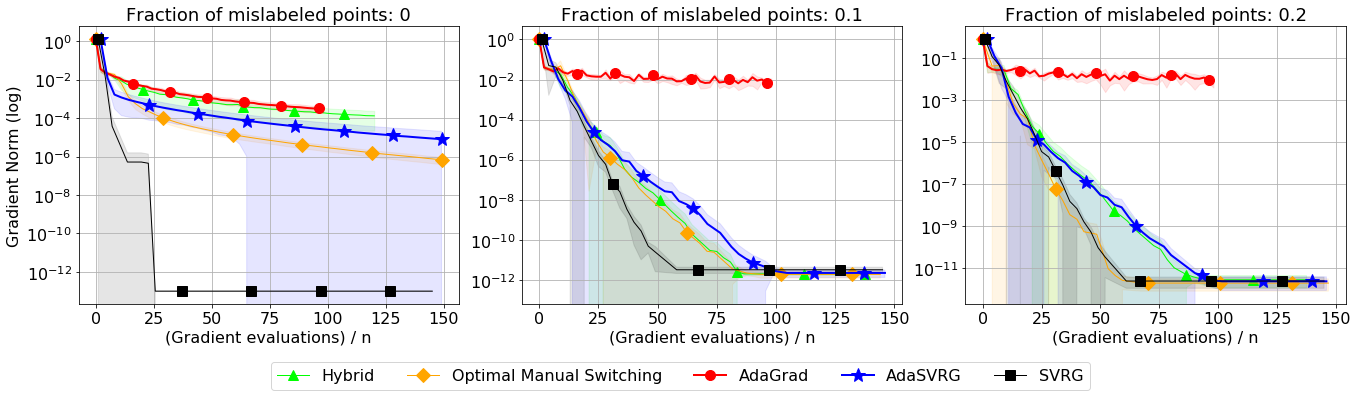

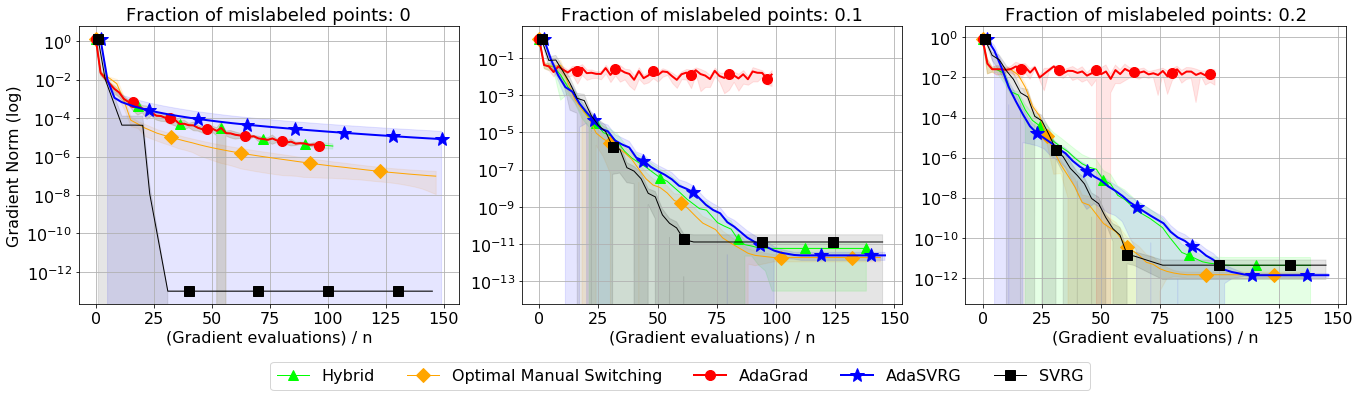

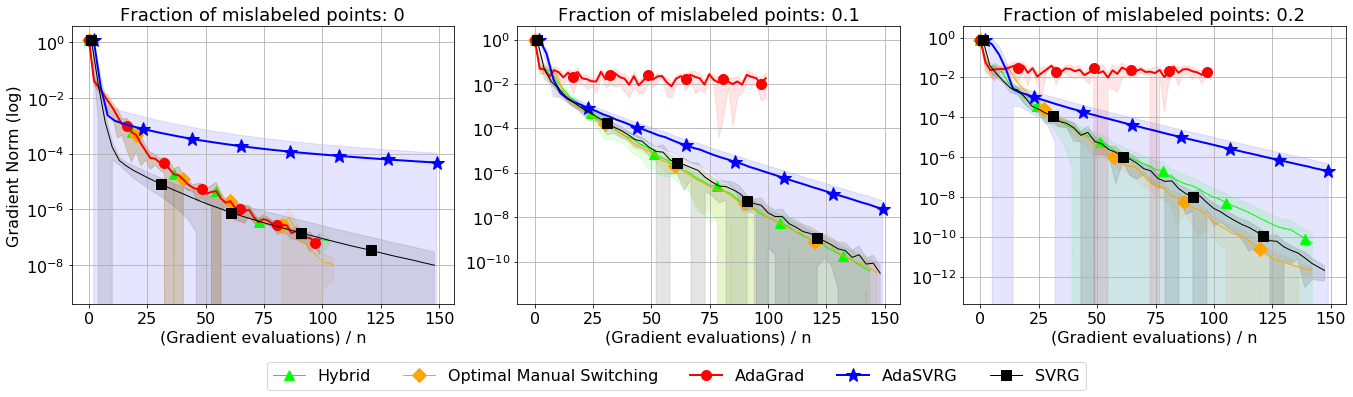

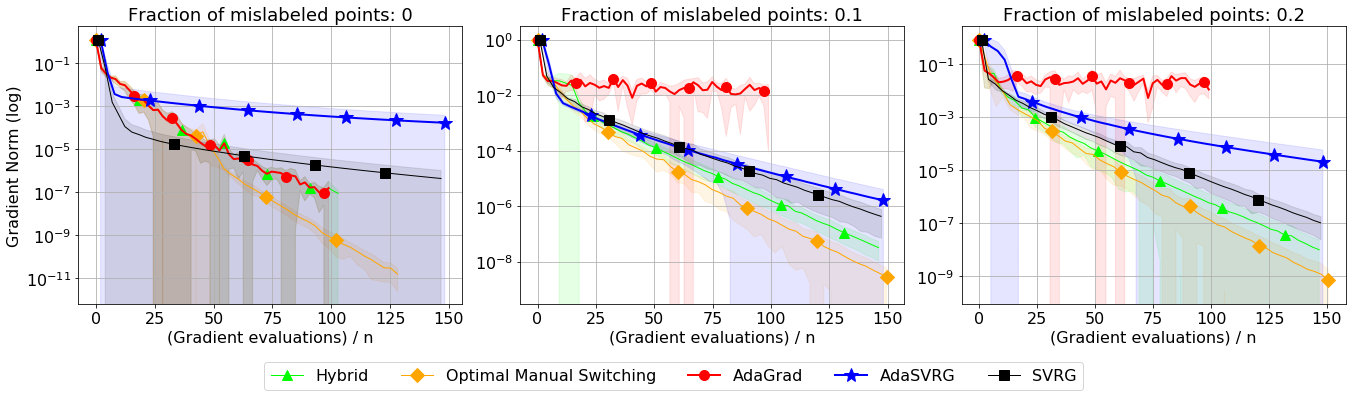

In [14]:
loss_func = "squared_hinge_loss"
loss = "hinge"
show_legend_all=None
for bs in [1, 8, 64, 128]:
    best_filterby_list = []
    best_filterby_list += [
    
     ({'opt':{'name':'AdaGrad', 'r':1/bs}, 
       'batch_size':bs, "loss_func":loss_func},      {'style':styles['sgd_ada']}), 
        
    
    ({'opt':{'name':'AdaSVRG', 'r':1/bs}, 
       'batch_size':bs, "loss_func":loss_func},     
       {'style':styles['svrg_ada']}),
    
    ({'opt':{'name':'AdaGrad_AdaSVRG', 'adaptive_termination':1, 'threshold_at':0.5, 'r':1/bs}, 
       'batch_size':bs, "loss_func":loss_func},
      
       {'style':styles['sgd_ada_svrg_ada']}),
    
        
    ]
    
    for false_ratio in [0, 0.1, 0.2]:
        best_filterby_list += [
            
            ({'opt':{'name':'AdaGrad_AdaSVRG', 'adaptive_termination':0, 'r':1/bs, 
                     'max_epoch_sgd':best_breakpoint[loss + "_"+ str(bs) + "_" + str(false_ratio)]}, 
       'batch_size':bs, "loss_func":loss_func, 'false_ratio':false_ratio},
      
       {'style':styles['sgd_ada_svrg_ada_manual']}),
            
           # ({'opt':{'name':'sls',
            #         'init_step_size': best_step_sizes["sls_" + str(bs) + "_" + loss + "_syn_interpolation_" + str(false_ratio)]},
             #'batch_size':bs, "loss_func":loss_func, 'false_ratio':false_ratio, 'max_epoch':100},
            
            #{'style':styles['sls']}),
            
            ({'opt':{'name':'SVRG',
                     'init_step_size': best_step_sizes["svrg_" + str(bs) + "_" + loss + "_syn_interpolation_" + str(false_ratio)]},
             'batch_size':bs, "loss_func":loss_func, 'false_ratio':false_ratio},
            
            {'style':styles['svrg']}),
            
        ]

    combined_filterby_list = best_filterby_list 
    exp_groups = [
          "exp_syn_interpolation6"
             ]
    exp_list = form_exp_list(exp_groups, exp_config_fname)    


    

    combined_exp_list =  exp_list

    dataset_filterby_list = [
                        {'dataset': 'synthetic'}
                        ]
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                    exp_list=main_exp_list,
                    savedir_base=savedir_base, 
                    filterby_list = combined_filterby_list,
                    verbose=0,        
                     )
    rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.init_step_size'], 
                title_list = ['false_ratio'], 
                title_format = 'Fraction of mislabeled points: {}',
                groupby_list = ['dataset', 'false_ratio'],
                log_metric_list = ["grad_norm"],
    #map_title_list=[
     #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
      #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
       #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
        #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],
    
                

                        legend_fontsize=16,
                          x_fontsize=16,
                          y_fontsize=16,
                          xtick_fontsize=16,
                          ytick_fontsize=16,
                          title_fontsize=18,
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'step_size':'Step size'},
                    {'grad_norm': 'Gradient Norm'},
                    {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'epoch':'Epoch'},
                    {'n_grad_evals_normalized': '(Gradient evaluations) / n'}],
                figsize=(19,5),
    plot_confidence=True,
    #legend_kwargs={'bbox_to_anchor':[-1.45, -0.26], 'ncol':7, 'loc':'center'},
    legend_kwargs={'bbox_to_anchor':[-0.75, -0.26], 'ncol':7, 'loc':'center'},
    #savedir_plots='/mnt/home/projects/sls_private/plots/main_deep'
            )

# Poor performance of AdaGrad vs VR methods

In [15]:
def form_exp_list(exp_groups, exp_config_fname):
    exp_list = []
    for e in exp_groups:
        exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
    return exp_list

def get_exp_ids(exp_list, standard_filterby_list=None, best_filterby_list=None):    
    # filter based on standard lists
    exp_list_filtered = hr.filter_exp_list(exp_list, filterby_list=standard_filterby_list, verbose=0)

    # start enumerating the IDs to plot. 
    exp_ids = []

    if standard_filterby_list is not None:
        # get the IDs of the standard exps
        for exp_dict in exp_list_filtered:
            exp_id = hu.hash_dict(exp_dict)  
            exp_ids += [exp_id]

    if best_filterby_list is not None:
        # handle the exps for which we need the best configuration
        for filterby_list in best_filterby_list:
            exp_dict = hr.get_best_exp_dict(exp_list, savedir_base, filterby_list=filterby_list,
                                            metric='train_loss', min_or_max='min', return_scores=False, verbose=False)
            if len(exp_dict) == 0:
                continue

            exp_id = hu.hash_dict(exp_dict)
        #         print(exp_id)
        #         stop
            exp_ids += [exp_id]
    return exp_ids

markersize = 8
markevery = 15
linewidth = 5
marker = '*'
styles = {}



styles['svrg_ada'] = {'label':'AdaSVRG',  'color':'blue','marker':marker ,
                         'markersize':15, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }



styles['svrg'] = {'label':'SVRG',  'color':'red','marker':markersize ,
                         'markersize':10, 'marker':'s',
                           'linewidth': linewidth,
                     'markevery':13 }


styles['sgd_ada'] = {'label':'AdaGrad',  'color':'grey','marker':markersize ,
                         'markersize':10, 'marker':'D',
                           'linewidth': linewidth,
                     'markevery':markevery }


best_step_sizes = {

                  
    
                  'svrg_1_logistic_w8a':1e-1,
                  'svrg_bb_1_logistic_w8a':1e-3,
                  'sarah_1_logistic_w8a':1e-1,
                  'svrg_loopless_1_logistic_w8a':1e-1,
                  'svrg_1_huber_w8a':1e-2,
                  'svrg_bb_1_huber_w8a':1e-2,
                  'sarah_1_huber_w8a':1e-2,
                  'svrg_loopless_1_huber_w8a':1e-2,
                  'svrg_1_squared_w8a':1e-2,
                  'svrg_bb_1_squared_w8a':1e-3,
                  'sarah_1_squared_w8a':1e-2,
                  'svrg_loopless_1_squared_w8a':1e-2,
    
                  'svrg_8_logistic_w8a':1,
                  'svrg_bb_8_logistic_w8a':1e-3,
                  'sarah_8_logistic_w8a':1,
                  'svrg_loopless_8_logistic_w8a':1,
                  'svrg_8_huber_w8a':1e-1,
                  'svrg_bb_8_huber_w8a':1e-2,
                  'sarah_8_huber_w8a':1e-1,
                  'svrg_loopless_8_huber_w8a':1e-1,
                  'svrg_8_squared_w8a':1e-1, #or 1e-2 for more stability
                  'svrg_bb_8_squared_w8a':1e-2,
                  'sarah_8_squared_w8a':1e-1,
                  'svrg_loopless_8_squared_w8a':1e-1, #or 1e-2 for more stability
    
                  'svrg_64_logistic_w8a':1,
                  'svrg_bb_64_logistic_w8a':1e-1,
                  'sarah_64_logistic_w8a':1,
                  'svrg_loopless_64_logistic_w8a':1,
                  'svrg_64_huber_w8a':1, #or 1e-1 for mor stability
                  'svrg_bb_64_huber_w8a':1,
                  'sarah_64_huber_w8a':1e-1,
                  'svrg_loopless_64_huber_w8a':1, #or 1e-1 for more stability
                  'svrg_64_squared_w8a':1e-1,
                  'svrg_bb_64_squared_w8a':1e-1,
                  'sarah_64_squared_w8a':1e-1,
                  'svrg_loopless_64_squared_w8a':1e-1,
    
                  'svrg_128_logistic_w8a':1,
                  'svrg_bb_128_logistic_w8a':1,
                  'sarah_128_logistic_w8a':1,
                  'svrg_loopless_128_logistic_w8a':1,
                  'svrg_128_huber_w8a':1,
                  'svrg_bb_128_huber_w8a':1,
                  'sarah_128_huber_w8a':1,
                  'svrg_loopless_128_huber_w8a':1,
                  'svrg_128_squared_w8a':1e-1,
                  'svrg_bb_128_squared_w8a':1e-2,
                  'sarah_128_squared_w8a':1e-1,
                  'svrg_loopless_128_squared_w8a':1e-1,
    
    
    
    
                  'svrg_1_logistic_a1a':1e-1,
                  'svrg_bb_1_logistic_a1a':1e-1,
                  'sarah_1_logistic_a1a':1e-1,
                  'svrg_loopless_1_logistic_a1a':1e-1,
                  'svrg_1_huber_a1a':1e-2,
                  'svrg_bb_1_huber_a1a':1e-1,
                  'sarah_1_huber_a1a':1e-2,
                  'svrg_loopless_1_huber_a1a':1e-2,
                  'svrg_1_squared_a1a':1e-2,
                  'svrg_bb_1_squared_a1a':1e-2,
                  'sarah_1_squared_a1a':1e-2,
                  'svrg_loopless_1_squared_a1a':1e-2,
    
                  'svrg_8_logistic_a1a':1,
                  'svrg_bb_8_logistic_a1a':1e-1,
                  'sarah_8_logistic_a1a':1,
                  'svrg_loopless_8_logistic_a1a':1,
                  'svrg_8_huber_a1a':1e-1,
                  'svrg_bb_8_huber_a1a':1e-3,
                  'sarah_8_huber_a1a':1e-1,
                  'svrg_loopless_8_huber_a1a':1e-1,
                  'svrg_8_squared_a1a':1e-1, 
                  'svrg_bb_8_squared_a1a':1e-3,
                  'sarah_8_squared_a1a':1e-1,
                  'svrg_loopless_8_squared_a1a':1e-1, #1e-2 for more stability
    
                  'svrg_64_logistic_a1a':1,
                  'svrg_bb_64_logistic_a1a':1,
                  'sarah_64_logistic_a1a':1,
                  'svrg_loopless_64_logistic_a1a':1,
                  'svrg_64_huber_a1a':1e-1, 
                  'svrg_bb_64_huber_a1a':1e-2,
                  'sarah_64_huber_a1a':1e-1,
                  'svrg_loopless_64_huber_a1a':1e-1,
                  'svrg_64_squared_a1a':1e-1,
                  'svrg_bb_64_squared_a1a':1e-3,
                  'sarah_64_squared_a1a':1e-1,
                  'svrg_loopless_64_squared_a1a':1e-1,
    
                  'svrg_128_logistic_a1a':1,
                  'svrg_bb_128_logistic_a1a':1e-1,
                  'sarah_128_logistic_a1a':1,
                  'svrg_loopless_128_logistic_a1a':1,
                  'svrg_128_huber_a1a':1e-1, 
                  'svrg_bb_128_huber_a1a':1,
                  'sarah_128_huber_a1a':1e-1,
                  'svrg_loopless_128_huber_a1a':1e-1,
                  'svrg_128_squared_a1a':1e-1,
                  'svrg_bb_128_squared_a1a':1e-3,
                  'sarah_128_squared_a1a':1e-1,
                  'svrg_loopless_128_squared_a1a':1e-1,
    
    
    
    
                  'svrg_1_logistic_a2a':1e-1,
                  'svrg_bb_1_logistic_a2a':1e-3,
                  'sarah_1_logistic_a2a':1e-1,
                  'svrg_loopless_1_logistic_a2a':1e-1,
                  'svrg_1_huber_a2a':1e-2,
                  'svrg_bb_1_huber_a2a':1e-1,
                  'sarah_1_huber_a2a':1e-2,
                  'svrg_loopless_1_huber_a2a':1e-2,
                  'svrg_1_squared_a2a':1e-2,
                  'svrg_bb_1_squared_a2a':1e-2,
                  'sarah_1_squared_a2a':1e-2,
                  'svrg_loopless_1_squared_a2a':1e-2,
    
                  'svrg_8_logistic_a2a':1,
                  'svrg_bb_8_logistic_a2a':1,
                  'sarah_8_logistic_a2a':1,
                  'svrg_loopless_8_logistic_a2a':1,
                  'svrg_8_huber_a2a':1e-1,
                  'svrg_bb_8_huber_a2a':1e-3,
                  'sarah_8_huber_a2a':1e-1,
                  'svrg_loopless_8_huber_a2a':1e-1,
                  'svrg_8_squared_a2a':1e-1,
                  'svrg_bb_8_squared_a2a':1e-1,
                  'sarah_8_squared_a2a':1e-1,
                  'svrg_loopless_8_squared_a2a':1e-1,
    
                  'svrg_64_logistic_a2a':1,
                  'svrg_bb_64_logistic_a2a':1e-1,
                  'sarah_64_logistic_a2a':1,
                  'svrg_loopless_64_logistic_a2a':1,
                  'svrg_64_huber_a2a':1e-1,
                  'svrg_bb_64_huber_a2a':1e-2,
                  'sarah_64_huber_a2a':1e-1,
                  'svrg_loopless_64_huber_a2a':1e-1,
                  'svrg_64_squared_a2a':1e-1,
                  'svrg_bb_64_squared_a2a':1e-2,
                  'sarah_64_squared_a2a':1e-1,
                  'svrg_loopless_64_squared_a2a':1e-1,
    
                  'svrg_128_logistic_a2a':1,
                  'svrg_bb_128_logistic_a2a':1e-1,
                  'sarah_128_logistic_a2a':1,
                  'svrg_loopless_128_logistic_a2a':1,
                  'svrg_128_huber_a2a':1e-1,
                  'svrg_bb_128_huber_a2a':1e-3,
                  'sarah_128_huber_a2a':1e-1,
                  'svrg_loopless_128_huber_a2a':1e-1,
                  'svrg_128_squared_a2a':1e-1,
                  'svrg_bb_128_squared_a2a':1e-2,
                  'sarah_128_squared_a2a':1e-1,
                  'svrg_loopless_128_squared_a2a':1e-1,
    
    
    
    
                  'svrg_1_logistic_mushrooms':1e-1,
                  'svrg_bb_1_logistic_mushrooms':1e-1,
                  'sarah_1_logistic_mushrooms':1e-1,
                  'svrg_loopless_1_logistic_mushrooms':1e-1,
                  'svrg_1_huber_mushrooms':1e-2,
                  'svrg_bb_1_huber_mushrooms':1e-2,
                  'sarah_1_huber_mushrooms':1e-2,
                  'svrg_loopless_1_huber_mushrooms':1e-2, #or 1e-3 for more stability
                  'svrg_1_squared_mushrooms':1e-2,
                  'svrg_bb_1_squared_mushrooms':1e-3,
                  'sarah_1_squared_mushrooms':1e-2,
                  'svrg_loopless_1_squared_mushrooms':1e-2, #or 1e-3 for more stability
    
                  'svrg_8_logistic_mushrooms':1,
                  'svrg_bb_8_logistic_mushrooms':10,
                  'sarah_8_logistic_mushrooms':1,
                  'svrg_loopless_8_logistic_mushrooms':1,
                  'svrg_8_huber_mushrooms':1e-1,
                  'svrg_bb_8_huber_mushrooms':1e-2,
                  'sarah_8_huber_mushrooms':1e-1,
                  'svrg_loopless_8_huber_mushrooms':1e-1, #or 1e-2 for more stability
                  'svrg_8_squared_mushrooms':1e-3, 
                  'svrg_bb_8_squared_mushrooms':1e-2,
                  'sarah_8_squared_mushrooms':1e-2,
                  'svrg_loopless_8_squared_mushrooms':1e-2,
    
                  'svrg_64_logistic_mushrooms':10,
                  'svrg_bb_64_logistic_mushrooms':1e-2,
                  'sarah_64_logistic_mushrooms':1,
                  'svrg_loopless_64_logistic_mushrooms':10, 
                  'svrg_64_huber_mushrooms':1e-1, 
                  'svrg_bb_64_huber_mushrooms':1e-1,
                  'sarah_64_huber_mushrooms':1e-1,
                  'svrg_loopless_64_huber_mushrooms':1e-1,
                  'svrg_64_squared_mushrooms':1e-2,
                  'svrg_bb_64_squared_mushrooms':1e-3,
                  'sarah_64_squared_mushrooms':1e-2,
                  'svrg_loopless_64_squared_mushrooms':1e-2,
    
                  'svrg_128_logistic_mushrooms':10,
                  'svrg_bb_128_logistic_mushrooms':1e-1,
                  'sarah_128_logistic_mushrooms':10,
                  'svrg_loopless_128_logistic_mushrooms':10, #wait for stepsize = 100 result
                  'svrg_128_huber_mushrooms':1e-1,
                  'svrg_bb_128_huber_mushrooms':1e-2,
                  'sarah_128_huber_mushrooms':1e-1,
                  'svrg_loopless_128_huber_mushrooms':1e-1,
                  'svrg_128_squared_mushrooms':1e-2,
                  'svrg_bb_128_squared_mushrooms':1e-2,
                  'sarah_128_squared_mushrooms':1e-2,
                  'svrg_loopless_128_squared_mushrooms':1e-2,
    
    
    
    
    
                  'svrg_1_logistic_phishing':10,
                  'svrg_bb_1_logistic_phishing':10,
                  'sarah_1_logistic_phishing':10,
                  'svrg_loopless_1_logistic_phishing':10,
                  'svrg_1_huber_phishing':1e-1,
                  'svrg_bb_1_huber_phishing':1e-2,
                  'sarah_1_huber_phishing':1e-1,
                  'svrg_loopless_1_huber_phishing':1e-1,
                  'svrg_1_squared_phishing':1e-1,
                  'svrg_bb_1_squared_phishing':1e-2,
                  'sarah_1_squared_phishing':1e-1,
                  'svrg_loopless_1_squared_phishing':1e-1,
    
                  'svrg_8_logistic_phishing':100,
                  'svrg_bb_8_logistic_phishing':1,
                  'sarah_8_logistic_phishing':100,
                  'svrg_loopless_8_logistic_phishing':100,
                  'svrg_8_huber_phishing':1,
                  'svrg_bb_8_huber_phishing':1,
                  'sarah_8_huber_phishing':1,
                  'svrg_loopless_8_huber_phishing':1,
                  'svrg_8_squared_phishing':1, 
                  'svrg_bb_8_squared_phishing':1,
                  'sarah_8_squared_phishing':1, 
                  'svrg_loopless_8_squared_phishing':1,
    
                  'svrg_64_logistic_phishing':100,
                  'svrg_bb_64_logistic_phishing':10,
                  'sarah_64_logistic_phishing':100,
                  'svrg_loopless_64_logistic_phishing':100,
                  'svrg_64_huber_phishing':1, 
                  'svrg_bb_64_huber_phishing':1e-3,
                  'sarah_64_huber_phishing':1, 
                  'svrg_loopless_64_huber_phishing':1,
                  'svrg_64_squared_phishing':1,
                  'svrg_bb_64_squared_phishing':1,
                  'sarah_64_squared_phishing':1,
                  'svrg_loopless_64_squared_phishing':1,
    
                  'svrg_128_logistic_phishing':100,
                  'svrg_bb_128_logistic_phishing':100,
                  'sarah_128_logistic_phishing':100,
                  'svrg_loopless_128_logistic_phishing':100,
                  'svrg_128_huber_phishing':1,
                  'svrg_bb_128_huber_phishing':1e-1,
                  'sarah_128_huber_phishing':1,
                  'svrg_loopless_128_huber_phishing':1,
                  'svrg_128_squared_phishing':1,
                  'svrg_bb_128_squared_phishing':1, #weird behavior
                  'sarah_128_squared_phishing':1,
                  'svrg_loopless_128_squared_phishing':1,
    
    
    
                 
                  'svrg_1_logistic_ijcnn':1,
                  'svrg_bb_1_logistic_ijcnn':1e-1,
                  'sarah_1_logistic_ijcnn':1,
                  'svrg_loopless_1_logistic_ijcnn':1,
                  'svrg_1_huber_ijcnn':1e-1,
                  'svrg_bb_1_huber_ijcnn':1e-2,
                  'sarah_1_huber_ijcnn':1e-1,
                  'svrg_loopless_1_huber_ijcnn':1e-1,
                  'svrg_1_squared_ijcnn':1e-2,
                  'svrg_bb_1_squared_ijcnn':1e-2,
                  'sarah_1_squared_ijcnn':1e-2,
                  'svrg_loopless_1_squared_ijcnn':1e-2,
    
                  'svrg_8_logistic_ijcnn':10,
                  'svrg_bb_8_logistic_ijcnn':1,
                  'sarah_8_logistic_ijcnn':1,
                  'svrg_loopless_8_logistic_ijcnn':10,
                  'svrg_8_huber_ijcnn':1e-1,
                  'svrg_bb_8_huber_ijcnn':1e-2,
                  'sarah_8_huber_ijcnn':1e-1,
                  'svrg_loopless_8_huber_ijcnn':1,
                  'svrg_8_squared_ijcnn':1e-1, 
                  'svrg_bb_8_squared_ijcnn':1e-1,
                  'sarah_8_squared_ijcnn':1e-1, 
                  'svrg_loopless_8_squared_ijcnn':1e-1,
    
                  'svrg_64_logistic_ijcnn':10,
                  'svrg_bb_64_logistic_ijcnn':10,
                  'sarah_64_logistic_ijcnn':10,
                  'svrg_loopless_64_logistic_ijcnn':10,
                  'svrg_64_huber_ijcnn':1, 
                  'svrg_bb_64_huber_ijcnn':1e-1,
                  'sarah_64_huber_ijcnn':1, 
                  'svrg_loopless_64_huber_ijcnn':1,
                  'svrg_64_squared_ijcnn':1,
                  'svrg_bb_64_squared_ijcnn':1,
                  'sarah_64_squared_ijcnn':1,
                  'svrg_loopless_64_squared_ijcnn':1,
    
                  'svrg_128_logistic_ijcnn':100,
                  'svrg_bb_128_logistic_ijcnn':10,
                  'sarah_128_logistic_ijcnn':100,
                  'svrg_loopless_128_logistic_ijcnn':100,
                  'svrg_128_huber_ijcnn':10,
                  'svrg_bb_128_huber_ijcnn':1,
                  'sarah_128_huber_ijcnn':10,
                  'svrg_loopless_128_huber_ijcnn':10,
                  'svrg_128_squared_ijcnn':1,
                  'svrg_bb_128_squared_ijcnn':1,
                  'sarah_128_squared_ijcnn':1,
                  'svrg_loopless_128_squared_ijcnn':1,

    
    
    
                  'svrg_1_logistic_rcv1':1,
                  'svrg_bb_1_logistic_rcv1':1,
                  'sarah_1_logistic_rcv1':1,
                  'svrg_loopless_1_logistic_rcv1':1,
                  'svrg_1_huber_rcv1':1,
                  'svrg_bb_1_huber_rcv1':1,
                  'sarah_1_huber_rcv1':1,
                  'svrg_loopless_1_huber_rcv1':1,
                  'svrg_1_squared_rcv1':1e-1,
                  'svrg_bb_1_squared_rcv1':1e-1,
                  'sarah_1_squared_rcv1':1e-1,  
                  'svrg_loopless_1_squared_rcv1':1e-1,
    
                  'svrg_8_logistic_rcv1':10,
                  'svrg_bb_8_logistic_rcv1':10,
                  'sarah_8_logistic_rcv1':10,
                  'svrg_loopless_8_logistic_rcv1':10,
                  'svrg_8_huber_rcv1':1,
                  'svrg_bb_8_huber_rcv1':1,
                  'sarah_8_huber_rcv1':1,
                  'svrg_loopless_8_huber_rcv1':1,
                  'svrg_8_squared_rcv1':1,
                  'svrg_bb_8_squared_rcv1':1,
                  'sarah_8_squared_rcv1':1,
                  'svrg_loopless_8_squared_rcv1':1,
    
                  'svrg_64_logistic_rcv1':100,
                  'svrg_bb_64_logistic_rcv1':100,
                  'sarah_64_logistic_rcv1':100,
                  'svrg_loopless_64_logistic_rcv1':100,
                  'svrg_64_huber_rcv1':10,
                  'svrg_bb_64_huber_rcv1':10,
                  'sarah_64_huber_rcv1':10,
                  'svrg_loopless_64_huber_rcv1':10,
                  'svrg_64_squared_rcv1':10,
                  'svrg_bb_64_squared_rcv1':10,
                  'sarah_64_squared_rcv1':10,
                  'svrg_loopless_64_squared_rcv1':10,
    
                  'svrg_128_logistic_rcv1':100,
                  'svrg_bb_128_logistic_rcv1':100,
                  'sarah_128_logistic_rcv1':100,
                  'svrg_loopless_128_logistic_rcv1':100,
                  'svrg_128_huber_rcv1':10,
                  'svrg_bb_128_huber_rcv1':1,
                  'sarah_128_huber_rcv1':10,
                  'svrg_loopless_128_huber_rcv1':10,
                  'svrg_128_squared_rcv1':10,
                  'svrg_bb_128_squared_rcv1':1e-3,
                  'sarah_128_squared_rcv1':10,
                  'svrg_loopless_128_squared_rcv1':10,
    
    
    
    
                  'svrg_1_logistic_syn_interpolation_0':100,
                  'svrg_1_logistic_syn_interpolation_0.1':1,
                  'svrg_1_logistic_syn_interpolation_0.2':1,
                  'svrg_1_hinge_syn_interpolation_0':1, # 1 reaches gradient norm 0 quickly, so is better but plots are bad
                  'svrg_1_hinge_syn_interpolation_0.1':1e-1,
                  'svrg_1_hinge_syn_interpolation_0.2':1e-1,
    
                  'sls_1_logistic_syn_interpolation_0':1000,
                  'sls_1_logistic_syn_interpolation_0.1':1e-2,
                  'sls_1_logistic_syn_interpolation_0.2':1e-2,
                  'sls_1_hinge_syn_interpolation_0':1, 
                  'sls_1_hinge_syn_interpolation_0.1':1e-3,
                  'sls_1_hinge_syn_interpolation_0.2':1e-3,
    
    
                  'svrg_8_logistic_syn_interpolation_0':1000,
                  'svrg_8_logistic_syn_interpolation_0.1':10,
                  'svrg_8_logistic_syn_interpolation_0.2':10,
                  'svrg_8_hinge_syn_interpolation_0':10, 
                  'svrg_8_hinge_syn_interpolation_0.1':1,
                  'svrg_8_hinge_syn_interpolation_0.2':1,
    
                  'sls_8_logistic_syn_interpolation_0':1000,
                  'sls_8_logistic_syn_interpolation_0.1':1e-1,
                  'sls_8_logistic_syn_interpolation_0.2':1e-2,
                  'sls_8_hinge_syn_interpolation_0':10, 
                  'sls_8_hinge_syn_interpolation_0.1':1e-2,
                  'sls_8_hinge_syn_interpolation_0.2':1e-3,
    
            
                  'svrg_64_logistic_syn_interpolation_0':1000,
                  'svrg_64_logistic_syn_interpolation_0.1':10,
                  'svrg_64_logistic_syn_interpolation_0.2':10,
                  'svrg_64_hinge_syn_interpolation_0':10, 
                  'svrg_64_hinge_syn_interpolation_0.1':1,
                  'svrg_64_hinge_syn_interpolation_0.2':1,
    
                  'sls_64_logistic_syn_interpolation_0':1000,
                  'sls_64_logistic_syn_interpolation_0.1':1,
                  'sls_64_logistic_syn_interpolation_0.2':1e-1,
                  'sls_64_hinge_syn_interpolation_0':10, 
                  'sls_64_hinge_syn_interpolation_0.1':1e-1,
                  'sls_64_hinge_syn_interpolation_0.2':1e-2,
    
    
                  'svrg_128_logistic_syn_interpolation_0':1000,
                  'svrg_128_logistic_syn_interpolation_0.1':10,
                  'svrg_128_logistic_syn_interpolation_0.2':10,
                  'svrg_128_hinge_syn_interpolation_0':10, 
                  'svrg_128_hinge_syn_interpolation_0.1':1,
                  'svrg_128_hinge_syn_interpolation_0.2':1,
    
                  'sls_128_logistic_syn_interpolation_0':1000,
                  'sls_128_logistic_syn_interpolation_0.1':1,
                  'sls_128_logistic_syn_interpolation_0.2':1,
                  'sls_128_hinge_syn_interpolation_0':10, 
                  'sls_128_hinge_syn_interpolation_0.1':1e-1,
                  'sls_128_hinge_syn_interpolation_0.2':1e-1,
    
    
    
    
                 'svrg_1_logistic_kernel_ijcnn':1,
                 'sls_1_logistic_kernel_ijcnn':10,
    
                'svrg_8_logistic_kernel_ijcnn':10,
                'sls_8_logistic_kernel_ijcnn':100,
    
                'svrg_64_logistic_kernel_ijcnn':100,
                'sls_64_logistic_kernel_ijcnn':1000,
    
                'svrg_128_logistic_kernel_ijcnn':500,
                'sls_128_logistic_kernel_ijcnn':1000,
    
    
    
                'svrg_1_logistic_kernel_mushrooms':100,
                'sls_1_logistic_kernel_mushrooms':100000, #can probably go higher
    
                'svrg_8_logistic_kernel_mushrooms':100,
                'sls_8_logistic_kernel_mushrooms':100000, #can probably go higher
    
                'svrg_64_logistic_kernel_mushrooms':1000,
                'sls_64_logistic_kernel_mushrooms':100000, #can probably go higher
    
                'svrg_128_logistic_kernel_mushrooms':np.inf,
                'sls_128_logistic_kernel_mushrooms':10000000, #a bigger stepsize might also work but come on
    
    
    
                'sgd_ada_64_logistic_a1a':1,
                'sgd_ada_64_logistic_w8a':1,
                'sgd_ada_64_logistic_mushrooms':1,
                'sgd_ada_64_logistic_rcv1':10,
                    
                  
                  }

opt_to_remove = ['svrg_bb_1_squared_a1a', 'svrg_bb_64_squared_a1a', 'svrg_bb_128_squared_a1a',
                'svrg_bb_128_squared_mushrooms',
                'svrg_bb_128_squared_rcv1',
                'svrg_bb_64_squared_w8a', 'svrg_bb_128_squared_w8a',
                'svrg_bb_64_squared_a2a', 'svrg_bb_128_squared_a2a',
                'svrg_bb_64_squared_phishing', 'svrg_bb_128_squared_phishing']

Filtered: 8160/8160 experiments gathered...
./figures/_0.pdf saved


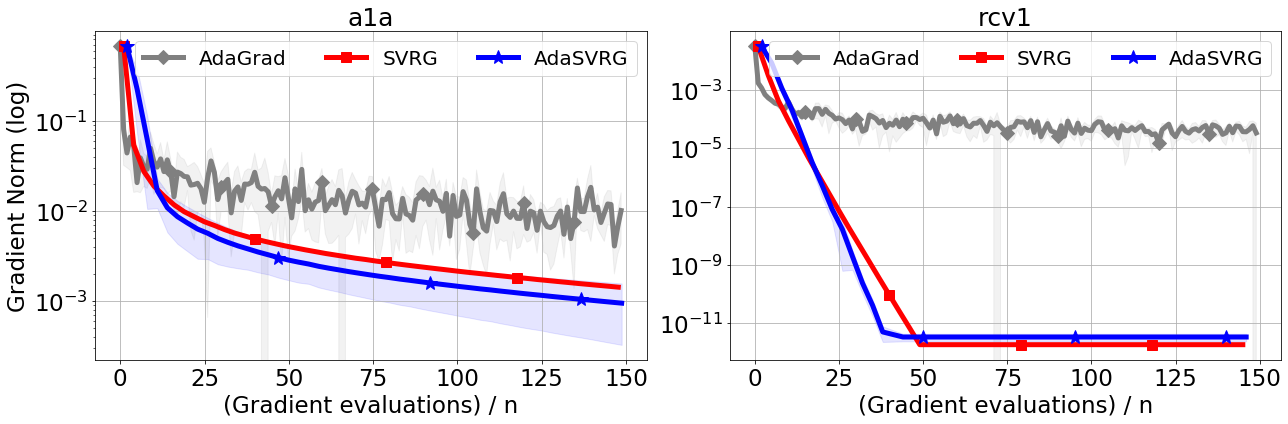

In [16]:
loss_func = "logistic_loss"
loss = "logistic"
datasets = [ "rcv1", "a1a"] #to be changed
show_legend_all=True

for bs in [64]:
    
    best_filterby_list = []
    exp_groups = []
    
    for dataset in datasets:
    
        best_filterby_list += [
            
            
     ({'opt':{'name':'AdaGrad', 'init_step_size':best_step_sizes["sgd_ada_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'max_epoch':150, 'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['sgd_ada']}),


        # best svrg 
            
         ({'opt':{'name':'SVRG', 'init_step_size':best_step_sizes["svrg_" + str(bs) + "_" + loss + "_" + dataset], 'r':1/bs}, 
           'batch_size':bs, "loss_func":loss_func, "dataset":dataset},

           {'style':styles['svrg']}),


        #svrg-ada optimizers

        ({'opt':{'name':'AdaSVRG', 'adaptive_termination':0, 'r':1/bs}, 'batch_size':bs, "loss_func":loss_func}

          , {'style':styles['svrg_ada']}),


    ]
        exp_groups.append("exp_" + dataset)

    combined_filterby_list = best_filterby_list 
    
    
    exp_list = form_exp_list(exp_groups, exp_config_fname)    


    

    combined_exp_list =  exp_list
    
    dataset_filterby_list = []
    for dataset in datasets:
        dataset_filterby_list.append({'dataset':dataset})
    main_exp_list = hr.filter_exp_list(combined_exp_list, dataset_filterby_list)

    rm = hr.ResultManager(
                    exp_list=main_exp_list,
                    savedir_base=savedir_base, 
                    filterby_list = combined_filterby_list,
                    verbose=0,        
                     )
    rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.init_step_size'], 
                title_list = ['dataset'], 
                groupby_list = ['dataset', 'model'],
                log_metric_list = ["grad_norm"],
    #map_title_list=[
     #               {'cifar10_resnet34':'CIFAR10 - ResNet34',
      #              'cifar100_densenet121_100':'CIFAR100 - DenseNet121',
       #             'cifar100_resnet34_100':'CIFAR100 - ResNet34',
        #            'tiny_imagenet_resnet18':'Tiny ImageNet - ResNet18'}],
    
                

                    # ylim_list=[
                     #                [(10**(-4), 5), (10**(-3.5), 5), (10**(-3), 5), None], 
                      #               [(0.86,0.95), (0.65,0.76), (0.65,0.76), (0.34,0.4)], 
#
 #                             ],
    
                     #  xlim_list=[
                      #     [(0,200), (5,200), (0,200), (0,200)],
                       #     [(0,200), (5,200), (0,200), (40,200)],                         
                        #         ],

                        legend_fontsize=20,
                          x_fontsize=23,
                          y_fontsize=23,
                          xtick_fontsize=23,
                          ytick_fontsize=23,
                          title_fontsize=25,
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'step_size':'Step size'},
                    {'grad_norm': 'Gradient Norm'},
                    {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'epoch':'Epoch'},
                    {'n_grad_evals_normalized': '(Gradient evaluations) / n'}],
                figsize=(18,6),
    plot_confidence=True,
    #legend_kwargs={'bbox_to_anchor':[-1.50, -0.26], 'ncol':20, 'loc':'center'},
        legend_kwargs={ 'ncol':100},
    savedir_plots='./figures/'
            )
    

# Diagonal experiments

In [ ]:
markersize = 15
markevery = 15
linewidth = 2
marker = '*'
styles = {}


styles['svrg_ada_scalar'] = {'label':'AdaSVRG - scalar','linewidth':linewidth, 'color':'b', 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery }

styles['svrg_ada_diagonal'] = {'label':'AdaSVRG - diagonal','linewidth':linewidth, 'color':'g', 
                     'marker':'o', 'markersize':markersize, 'markevery':markevery }


loss_func = "logistic_loss"
exp_list = []
batch_size = 64

for exp_group in [
    "exp_a1a_diagonal",
    "exp_w8a_diagonal",
    "exp_mushrooms_diagonal"
    ]:
    exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[exp_group]


# plotting the best configs against adagrad
for batch_size in [64]:
    filterby_list = [       
    
    ({'opt': {'name': 'AdaSVRG_General', 'variant':"scalar"}, 'batch_size':batch_size, 'loss_func': loss_func},
       {'style':styles['svrg_ada_scalar']}),
        
        ({'opt': {'name': 'AdaSVRG_General', 'variant':"diagonal"}, 'batch_size':batch_size, 'loss_func': loss_func},
       {'style':styles['svrg_ada_diagonal']}),
        
    
    ]

# get experiments
    rm = hr.ResultManager(exp_list=exp_list, 
                      filterby_list=filterby_list,
                      savedir_base=savedir_base, 
                      verbose=0, 
                      score_list_name='score_list.pkl'                      
                     )
#print(hr.filter_exp_list(rm.exp_list, filterby_list=filterby_list, savedir_base=savedir_base))

    rm.get_plot_all(
    plot_median = True,
    avg_across='runs',
    order='metrics_by_groups',
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals_normalized',
                legend_list=['opt.name', 'opt.adaptive_termination'], 
                title_list = ['dataset'], 
                groupby_list = ['loss_func', 'dataset'],
                log_metric_list = ['grad_norm'], 
        show_legend_all=True,
                

                 legend_fontsize=16,
                  x_fontsize=16,
                  y_fontsize=16,
                  xtick_fontsize=16,
                  ytick_fontsize=16,
                  title_fontsize=20,
    

    map_ylabel_list=[{'grad_norm':'Gradient Norm'}, 
                    ],   
    map_xlabel_list=[{'n_grad_evals': 'Num_grad_evals',
                      'n_grad_evals_normalized': '(Gradient evaluations)  / n'}],
                figsize=(18,6),
    plot_confidence=True,
        legend_kwargs={ 'ncol':1}
            )
